<a href="https://colab.research.google.com/github/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/cristie_mod6_proj_final_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **Ciência de Dados: Fundamentos de Machine Learning**
---
---

## **Pós-graduação em Ciência de Dados (2025/2026)**

**Escola Superior de Tecnologia da Universidade Estadual do Amazonas - EST/UEA**
    
**Disciplina:** Fundamentos de Machine Learning

**Prof. Me.:** Mario Bessa

_**Repositório do Projeto Acadêmico no Github:** [e-SUS_Sinan_Mpox_ML-Workflow](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow)_

_**Alunos:**_

- _A. Cristiane R. Lima (Cristie)_

_**Data - Parte 1:** 30 de agosto de 2025_


## **Projeto Final**
Este projeto está dividido em 2 notebooks para contemplar o fluxo completo de pré-modelagem e modelagem para o dataset [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox), seguindo uma estrutura padronizada, do seguinte modo:

- cristie_mod6_proj_final_parte_1.ipynb: Aquisição, Análise Descritiva e Exploratória de Dados (EDA), Pré-processamento (Correção )

Foi desenvolvido a partir do notebook-base apresentado e explicado ao longo as aulas teórico-práticas em laboratório do Professor.

---

💡 **Nota técnica:** O link para o Dicionário de Dados está disponível na seção de *Análise Descritiva*. Recomenda-se mantê-lo aberto para facilitar a interpretação das variáveis.

⚠️ **Observação:** Linhas com o comentário `#debug#` indicam trechos opcionais para testes e inspeções pontuais — como a geração de arquivos `.csv` temporários para verificar o estado do DataFrame após imputações.

📚 **Referência:**  
KELLEHER, John D.; MAC NAMEE, Brian; D’ARCY, Aoife. *Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies*. 2. ed. Cambridge, MA: MIT Press, 2020.


---
### **Contextualização do Projeto**

A Mpox (Monkeypox) é uma doença infecciosa emergente que ganhou atenção internacional devido ao seu potencial de disseminação e impacto na saúde pública. No Brasil, o sistema e-SUS Sinan tem sido fundamental para o registro e monitoramento dos casos, permitindo a construção de bases de dados estruturadas para análise epidemiológica.

Este projeto tem como objetivo aplicar técnicas de aprendizado de máquina para explorar, tratar e modelar os dados disponíveis, com foco na geração de insights preditivos que possam apoiar estratégias de vigilância e resposta. A abordagem adotada contempla desde o pré-processamento e imputação de dados até a construção de modelos supervisionados, seguindo diretrizes metodológicas discutidas em ambiente acadêmico.

---

**Instruções:**

- Realizar os processamentos abaixo:

  - No notebook `cristie_mod6_proj_final_parte_1.ipynb`:
    -  Atividade 1: Limpar dados incorretos
    -  Atividade 2: Imputação de valores faltantes
    -  Atividade 3: Codificação de variáveis categóricas (OrdinalEncoder e OneHotEncoder)
    -  Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)
  - No notebook `cristie_mod6_proj_final_parte_2.ipynb`:
    -  Atividade 5: Balanceamento dos dados (Tomek e Smote)
    -  Atividade 6: Treinamento dos modelos de Machine Learning
    -  Atividade 7: Usar o modelo treinado

---
---

# **Dataset: [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox)**

---
---

Link do dataset: [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox)

    As informações desta seção foram extraídas do link oficial do dataset:

O Projeto e-SUS Sinan tem como objetivo modernizar o Sistema de Informação de Agravos de Notificação (Sinan), além de registrar em tempo real as notificações das doenças e agravos que compõem a lista nacional de notificação compulsória e substituir as versões vigentes (Sinan NET e Sinan Online) do sistema Sinan, bem como os aplicativos auxiliares.

Referências:

    http://plataforma.saude.gov.br/esussinan/
    http://plataforma.saude.gov.br/esussinan/manual-instrucoes-esussinan-2ed.pdf
    http://plataforma.saude.gov.br/esussinan/dicionario-notificacao-esussinan.pdf
    http://plataforma.saude.gov.br/esussinan/dicionario-investigacao-monkeypox-esussinan.pdf

---
## **Importação das bibliotecas e dos pacotes**
---

In [1]:
# !pip -q install
"""
!pip install pandas --upgrade
!pip install numpy --upgrade

!pip install matplotlib --upgrade
!pip install seaborn --upgrade

!pip install plotly --upgrade
!pip install yellowbrick --upgrade

!pip install sklearn --upgrade
"""

'\n!pip install pandas --upgrade\n!pip install numpy --upgrade\n\n!pip install matplotlib --upgrade\n!pip install seaborn --upgrade\n\n!pip install plotly --upgrade\n!pip install yellowbrick --upgrade\n\n!pip install sklearn --upgrade\n'

In [2]:
# Para aquisição dos dados do e-SUS Sinan/Mpox
import zipfile, io

# Para remover avisos durante a geração de gráficos
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) #suspende avisos de obsolescência de função

In [3]:
# Para análise e manipulação de dados
# pandas: dados tabulares; numpy: numéricos; datetime:datas e horários
import pandas as pd
import numpy as np
from datetime import datetime, date
import re # para manipular texto
from scipy import stats

#Para visualização de dados (gráficos)
# matplotlib: básicos (plotly: mais simple); seaborn: mais atraentes;
# plotly: interativos e sofisticados (express: mais simples)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Para serializar/salvar e desserializar/carregar objetos em formato .pkl (nativo de Python)
import pickle

In [5]:
# Para filtro de variância
from sklearn.feature_selection import VarianceThreshold

In [6]:
# Para aplicar OrdinalEncoder ou OneHotEncoder em variáveis categóricas
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Para aplicar StandardScaler e MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Para garantir X 100% numérico e sem NaN antes de Tomek/SMOTE
from sklearn.impute import SimpleImputer

# Para aplicar TomerkLinks e SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [7]:
# Para divisão das bases em treinamento e teste
from sklearn.model_selection import train_test_split

In [8]:
## Se necessário, biblioteca para ler arquivos excel
#import xlrd
#print(xlrd.__version__)

---

## **Tarefas preliminares: Aquisição, Correção de Tipagem e Exploração dos Dados (EDA)**

---

## **Aquisição**

Utiliza o recurso **Mpox 2022 (CSV/ZIP)** do OpenDataSUS. (Para usar **2023**,  **2024** ou **2025**, ajusta a URL abaixo pela correspondente do portal.)



Obtém o Dataset bruto

In [9]:
# Utilizado o de 2022 por ter mais linhas de observação
# URL do recurso .CSV compactado em .ZIP diretamente do OpenDataSUS (anos existentes: 2022, 2023, 2024, 2025)
DATA_URL = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/mpox/csv/mpox_2022.zip"

# Tente baixar e ler todos os CSVs dentro do ZIP
import requests

def _try_read_csv_from_bytes(b, encodings=('utf-8', 'latin-1'), seps=(',', ';')):
    last_err = None
    for enc in encodings:
        for sep in seps:
            try:
                df = pd.read_csv(io.BytesIO(b), encoding=enc, sep=sep, low_memory=False)
                return df
            except Exception as e:
                last_err = e
    raise last_err

def load_opendatasus_zip(url: str) -> pd.DataFrame:
    r = requests.get(url, timeout=120)
    r.raise_for_status()
    z = zipfile.ZipFile(io.BytesIO(r.content))
    dfs = []
    for name in z.namelist():
        if name.lower().endswith(".csv"):
            raw = z.read(name)
            # tenta detecção robusta de separadores/encodings
            df = None
            try:
                df = pd.read_csv(io.BytesIO(raw), sep=";", low_memory=False)
            except Exception:
                try:
                    df = pd.read_csv(io.BytesIO(raw), sep=",", low_memory=False)
                except Exception:
                    df = _try_read_csv_from_bytes(raw)
            df["__arquivo_origem__"] = name
            dfs.append(df)
    if not dfs:
        raise RuntimeError("Nenhum CSV encontrado dentro do ZIP.")
    out = pd.concat(dfs, ignore_index=True)
    return out

df_raw = load_opendatasus_zip(DATA_URL)
print("Registros carregados:", len(df_raw))
print("Amostra de colunas:", list(df_raw.columns)[:25])
df_raw.head(2)


Registros carregados: 10920
Amostra de colunas: ['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_NOTIFIC', 'CO_UF_RES', 'ID_MN_RESI', 'NU_IDADE_N', 'CS_SEXO', 'COMP_SEXUAL', 'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'DT_SIN_PRI', 'SINTOMA', 'IST_ATIVA', 'PAC_IMUNOSSUP', 'GONORREIA', 'CLAMIDEA', 'SIFILIS', 'HERPES_GENITAL', 'CANCRO_MOLE', 'TRICHOMOMAS_VAGINALS', 'LINFOGRANULOMA', 'MYCOPLASMA_GENITAL']


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,...,DT_EVOLUCAO,VINCULO_EPI,DOENCA_TRA.1,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,MET_LAB,CARACT_GENOMICA,CLADO,__arquivo_origem__
0,1,PB,PB,250750,08/12/2022,25,250750,34,1,1,...,13/12/2022,2,2,9.0,8.0,0.0,7,3.0,0.0,mpox_2022.csv
1,1,PR,PR,410690,09/08/2022,41,410690,36,1,1,...,01/09/2022,1,9,9.0,6.0,0.0,1,2.0,0.0,mpox_2022.csv


## **Salva Arquivo Bruto**

In [10]:
# Salva arquivo bruto

base_mpox = df_raw.copy() # usar .copy para não referenciar o mesmo endereço
Base_csv_file = base_mpox['__arquivo_origem__'][0]
print(Base_csv_file,':')

df_raw.to_csv("raw_" + Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

print("Tem", df_raw.shape[0], "linhas e", df_raw.shape[1], "colunas")
#debug# base_mpox.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

mpox_2022.csv :
Tem 10920 linhas e 56 colunas


## 📌 Nota da seção – Dataset bruto

- `df_raw` → dataframe original carregado a partir da fonte oficial (e-SUS Sinan Mpox 2022).  
- Contém todas as variáveis disponíveis, sem tratamento inicial.  
- Este dataframe é usado como **ponto de partida** para as etapas de limpeza, imputação e transformação.
- `base_mpox` → dataframe inicialmente é uma cópia do de dados brutos e será a baee de todas as mudanças por etapa

## **Diagnóstico de Tipagem de Dados Brutos**

Separa as colunas por tipos, a priori, para verificar se tipagem está correta, com base na seção 'Dicionário Técnico de Dados' do documento [Análise Descritiva do Dataset e-SUS Sinan/Mpox)](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/analise_descritiva_do_dataset_mpox_2022_esus_sinan.ipynb)

Obs.: Também vai auxiliar na remoção de colunas de variáveis identificadoras e na geração de histogramas e gráficos de barras

### Vetores de Colunas por Tipo de Variáveis

In [11]:
# ================================
# CATEGÓRICAS NOMINAIS (texto / códigos IBGE)
# ================================
nominal_categorical_cols = [
    'SG_UF',        # string, sigla da UF
    'SG_UF_NOT',    # string, sigla da UF da notificação
    'ID_MUNICIP',   # int64 (código IBGE)
    'CO_UF_RES',    # int64 (código IBGE da UF residência)
    'ID_MN_RESI'    # int64 (código IBGE município residência)
]

# ================================
# CATEGÓRICAS MÚLTIPLAS (lista em texto)
# ================================
list_multiple_categorical_cols = [
    'SINTOMA'   # object (lista de sintomas separados por vírgula)
]

# ================================
# TEXTO LIVRE
# ================================
text_cols = [
    'OUTRO_DES'   # object
]

# ================================
# NUMÉRICAS CATEGÓRICAS BINÁRIAS (0/1 após recodificação)
# ================================
numerical_as_binary_categ_cols = [
    'GONORREIA','CLAMIDEA','SIFILIS','HERPES_GENITAL','CANCRO_MOLE',
    'TRICHOMOMAS_VAGINALS','LINFOGRANULOMA','MYCOPLASMA_GENITAL',
    'HPV','DIP','DONOVANOSE','HTLV','VERRUGA_GENITAL'
]

# ================================
# NUMÉRICAS CATEGÓRICAS NOMINAIS (códigos)
# ================================
numerical_as_nominal_categ_cols = [
    'CLASSI_FIN', 'CS_SEXO','COMP_SEXUAL','ORIENTA_SEXUAL','IDENT_GENERO',
    'CS_RACA','PAC_IMUNOSSUP','IST_ATIVA','TP_AMOST','ESTRANGEIRO',
    'HIV','UTI','RESULTADO_EXA_LAB','PROFIS_SAUDE','VACINA',
    'TRATAMENTO_MONKEYPOX','HOSPITAL','EVOLUCAO','VINCULO_EPI',
    'LOCAL_CONT','TRANSM','CONTAT_ANIMAL', 'CS_GESTANT',
    'MET_LAB','CARACT_GENOMICA','CLADO',
    'DOENCA_TRA.1'   # ⚠️ ajustado: não é texto, é código categórico
]

# ==============COMENTADO==================
# CATEGÓRICAS ORDINAIS (numéricas com hierarquia natural)
# ================================
#numerical_as_ordinal_categ_cols = [
#    'CS_GESTANT'  # int64 → ordinal (ordem gestacional)]

# =============COMENTADO===================
# NUMÉRICAS REAIS / CONTÍNUAS
# ================================

# ================================
# NUMÉRICAS REAIS / DISCRETAS
# ================================
numerical_discrete_cols = [
    'NU_IDADE_N',   # int64 → idade em anos (discreta)
    'CONTAG_CD4'    # contagem de células CD4 (discreta, mas pode ser analisada como contínua)
]

# ================================
# TEMPORAIS (datas)
# ================================
date_temporal_cols = [
    'DT_NOTIFIC','DT_SIN_PRI','DT_COLETA','DATA_VACINA',
    'DT_INTERNA','DT_EVOLUCAO'   # todos devem virar datetime64[ns]
]

# ================================
# IDENTIFICADOR TÉCNICO
# ================================
identif_cols = [
    '__arquivo_origem__'  # object, só para rastreabilidade
]



### **Execução** do Diagnóstico

In [12]:
# 🔍 Checagem de dtypes por grupo de variáveis (inclui datas como float64)

# Dicionário: grupo → lista de colunas
col_groups = {
    "Categóricas nominais": nominal_categorical_cols,
    "Categóricas múltiplas (lista)": list_multiple_categorical_cols,
    "Texto livre": text_cols,
    "Binárias (numéricas)": numerical_as_binary_categ_cols,
    "Categóricas nominais (numéricas)": numerical_as_nominal_categ_cols,
    "Numéricas reais/discretas": numerical_discrete_cols,
    "Datas temporais": date_temporal_cols,
    "Identificador técnico": identif_cols
}

total_var = 0

for name, col_list in col_groups.items():
    cols = [c for c in col_list if c in base_mpox.columns]
    print(f"\n=== {name} ===")
    print(f"- Colunas esperadas: {len(col_list)} | Encontradas: {len(cols)}")
    total_var += len(cols)

    if cols:
        dtypes_real = base_mpox[cols].dtypes
        print("Dtypes reais:")
        print(dtypes_real)

        # Detecta inconsistências
        inconsist = {}
        for col, dtype in dtypes_real.items():
            if name == "Datas temporais":
                if dtype not in ["datetime64[ns]"]:
                    inconsist[col] = dtype
            elif name == "Numéricas reais/discretas":
                # 👇 Marca inconsistente se aparecer como object ou string
                if str(dtype) not in ["int64", "float64", "Int64"]:
                    inconsist[col] = dtype
            else:
                # Exemplo: se for float em colunas binárias, marca
                if name == "Binárias (numéricas)" and "float" in str(dtype):
                    inconsist[col] = dtype

        if inconsist:
            print("\n⚠️ Inconsistências (precisam conversão):")
            for col, dtype in inconsist.items():
                print(f"{col:20} {dtype}")
        else:
            print("✅ Todas consistentes.")
    else:
        print("⚠️ Nenhuma coluna encontrada no dataframe.")

print("\n\nTotal de colunas:", total_var)



=== Categóricas nominais ===
- Colunas esperadas: 5 | Encontradas: 5
Dtypes reais:
SG_UF         object
SG_UF_NOT     object
ID_MUNICIP     int64
CO_UF_RES      int64
ID_MN_RESI     int64
dtype: object
✅ Todas consistentes.

=== Categóricas múltiplas (lista) ===
- Colunas esperadas: 1 | Encontradas: 1
Dtypes reais:
SINTOMA    object
dtype: object
✅ Todas consistentes.

=== Texto livre ===
- Colunas esperadas: 1 | Encontradas: 1
Dtypes reais:
OUTRO_DES    object
dtype: object
✅ Todas consistentes.

=== Binárias (numéricas) ===
- Colunas esperadas: 13 | Encontradas: 13
Dtypes reais:
GONORREIA                 int64
CLAMIDEA                  int64
SIFILIS                   int64
HERPES_GENITAL            int64
CANCRO_MOLE             float64
TRICHOMOMAS_VAGINALS      int64
LINFOGRANULOMA            int64
MYCOPLASMA_GENITAL      float64
HPV                     float64
DIP                     float64
DONOVANOSE              float64
HTLV                    float64
VERRUGA_GENITAL         flo

## **Correção de Tipagem dos Dados Brutos**

In [13]:
## 🧩 Correção de tipagem

# Pré-requisitos
import re
import numpy as np
import pandas as pd

def to_Int64(s):
    return pd.to_numeric(s, errors='coerce').astype('Int64')

# 1) Converter binárias (e quaisquer categóricas numéricas que vieram como float por NaN) → Int64
binarias_ist = [
    'GONORREIA','CLAMIDEA','SIFILIS','HERPES_GENITAL','CANCRO_MOLE',
    'TRICHOMOMAS_VAGINALS','LINFOGRANULOMA','MYCOPLASMA_GENITAL',
    'HPV','DIP','DONOVANOSE','HTLV','VERRUGA_GENITAL'
]
for c in binarias_ist:
    if c in base_mpox.columns:
        base_mpox[c] = to_Int64(base_mpox[c])

# 2) Categóricas nominais (numéricas) suscetíveis a float → Int64
nominais_num_sensiveis = [
    'PROFIS_SAUDE','LOCAL_CONT','TRANSM','CONTAT_ANIMAL',
    'CARACT_GENOMICA','CLADO','TP_AMOST','MET_LAB','TRATAMENTO_MONKEYPOX',
    'DOENCA_TRA.1','IST_ATIVA','CS_GESTANT'
]
for c in nominais_num_sensiveis:
    if c in base_mpox.columns:
        base_mpox[c] = to_Int64(base_mpox[c])

# 3) Numéricas reais/discretas → formatos corretos
if 'NU_IDADE_N' in base_mpox.columns:
    base_mpox['NU_IDADE_N'] = to_Int64(base_mpox['NU_IDADE_N'])

if 'CONTAG_CD4' in base_mpox.columns:
    base_mpox['CONTAG_CD4'] = to_Int64(base_mpox['CONTAG_CD4'])

# 4) Datas → datetime64[ns] (dayfirst=True)
date_cols = ['DT_NOTIFIC','DT_SIN_PRI','DT_COLETA','DATA_VACINA','DT_INTERNA','DT_EVOLUCAO']
for d in date_cols:
    if d in base_mpox.columns:
        base_mpox[d] = pd.to_datetime(base_mpox[d], dayfirst=True, errors='coerce')

print("✔️ Tipagem corrigida.")


✔️ Tipagem corrigida.


## 🔎 Auditoria Pós-correção de Tipagem

In [14]:
## 🔍 Auditoria pós-correção de tipagem

# Checagem de CONTAG_CD4
if 'CONTAG_CD4' in base_mpox.columns:

    outlier_threshold_max = 3000

    outlier_impossivel_detectado = base_mpox[base_mpox['CONTAG_CD4'] > outlier_threshold_max]
    if not outlier_impossivel_detectado.empty:
        print("⚠️ Há valores discrepantes em CONTAG_CD4")
    else:
        print("✔️ CONTAG_CD4 sem valores discrepantes.")

    neg = base_mpox[base_mpox['CONTAG_CD4'] < 0]
    if not neg.empty:
        print("⚠️ Há valores negativos em CONTAG_CD4")
    else:
        print("✔️ CONTAG_CD4 sem negativos.")

# Checa se todas as colunas agora têm dtype esperado
col_groups = {
    "Binárias (ISTs)": binarias_ist,
    "Nominais numéricas": nominais_num_sensiveis,
    "Numéricas reais/discretas": ['NU_IDADE_N','CONTAG_CD4'],
    "Datas": date_cols
}

print("\n✔️ Tipagem corrigida para:")

for name, cols in col_groups.items():
    cols = [c for c in cols if c in base_mpox.columns]
    if cols:
        print(f"\n=== {name} ===")
        print(base_mpox[cols].dtypes)
    else:
        print(f"\n⚠️ Nenhuma coluna de {name} encontrada.")



⚠️ Há valores discrepantes em CONTAG_CD4
⚠️ Há valores negativos em CONTAG_CD4

✔️ Tipagem corrigida para:

=== Binárias (ISTs) ===
GONORREIA               Int64
CLAMIDEA                Int64
SIFILIS                 Int64
HERPES_GENITAL          Int64
CANCRO_MOLE             Int64
TRICHOMOMAS_VAGINALS    Int64
LINFOGRANULOMA          Int64
MYCOPLASMA_GENITAL      Int64
HPV                     Int64
DIP                     Int64
DONOVANOSE              Int64
HTLV                    Int64
VERRUGA_GENITAL         Int64
dtype: object

=== Nominais numéricas ===
PROFIS_SAUDE            Int64
LOCAL_CONT              Int64
TRANSM                  Int64
CONTAT_ANIMAL           Int64
CARACT_GENOMICA         Int64
CLADO                   Int64
TP_AMOST                Int64
MET_LAB                 Int64
TRATAMENTO_MONKEYPOX    Int64
DOENCA_TRA.1            Int64
IST_ATIVA               Int64
CS_GESTANT              Int64
dtype: object

=== Numéricas reais/discretas ===
NU_IDADE_N    Int64
CONTAG_

### Salva Dados Pós-correção de tipagem em .csv (_#debug#_)
  Neste caso, pode-se notar, se houver, que os dados faltantes foram preenchidos, conforme técnica aplicada a cada variável.

In [15]:
df_typefix = base_mpox.copy()
Base_csv_file = 'mpox_2022_typefix.csv'

#debug#
df_typefix.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

## **Análise Descritiva**

- Variável-alvo é *`target_hosp`*.
  
  ☑ Foi feita uma verificação com outras variáveis em essência relevantes mas, no fim das contas, permaneceu esta.

- A análise descritiva detalhada, feita para este estudo sobre o dataset, está disponível no link do GitHub:  [Análise Descritiva do Dataset e-SUS Sinan/Mpox)](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/analise_descritiva_do_dataset_mpox_2022_esus_sinan.ipynb)

## **Análise Exploratória**


In [16]:
type(base_mpox)

pandas.core.frame.DataFrame

In [17]:
print(base_mpox.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CLASSI_FIN            10920 non-null  int64         
 1   SG_UF                 10916 non-null  object        
 2   SG_UF_NOT             10920 non-null  object        
 3   ID_MUNICIP            10920 non-null  int64         
 4   DT_NOTIFIC            10920 non-null  datetime64[ns]
 5   CO_UF_RES             10920 non-null  int64         
 6   ID_MN_RESI            10920 non-null  int64         
 7   NU_IDADE_N            10920 non-null  Int64         
 8   CS_SEXO               10920 non-null  int64         
 9   COMP_SEXUAL           10920 non-null  int64         
 10  ORIENTA_SEXUAL        10920 non-null  int64         
 11  IDENT_GENERO          10920 non-null  int64         
 12  CS_RACA               10920 non-null  int64         
 13  DT_SIN_PRI      

#### Exibe o resultados estatísticos (incluindo moda) de todas variáveis:



Neste resumo estatístico, observa-se que CONTAG_CD4 tem número negativo (valor mínimo); média e mediana estão próximos para as variáveis numéricas

In [18]:
pd.set_option("display.max_columns", None)  # mostra todas as colunas
pd.set_option("display.max_rows", 12)     # mostra todas as linhas - não é muito bom usar (para nao mostrar todas as linhas do dataframe; melhor transpor a tabela)

descPlusMode = base_mpox.describe(include="all") # Obs: Faz transposição com .T, se quiser maximizar somente nro de colunas
descPlusMode.loc['mode'] = base_mpox.mode().iloc[0]

print('DataFrame (Linhas, Colunas) =',base_mpox.shape)

descPlusMode

DataFrame (Linhas, Colunas) = (10920, 56)


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,ORIENTA_SEXUAL,IDENT_GENERO,CS_RACA,DT_SIN_PRI,SINTOMA,IST_ATIVA,PAC_IMUNOSSUP,GONORREIA,CLAMIDEA,SIFILIS,HERPES_GENITAL,CANCRO_MOLE,TRICHOMOMAS_VAGINALS,LINFOGRANULOMA,MYCOPLASMA_GENITAL,HPV,DIP,DONOVANOSE,HTLV,VERRUGA_GENITAL,TP_AMOST,CS_GESTANT,DT_COLETA,ESTRANGEIRO,HIV,UTI,RESULTADO_EXA_LAB,PROFIS_SAUDE,CONTAG_CD4,VACINA,DATA_VACINA,OUTRO_DES,TRATAMENTO_MONKEYPOX,HOSPITAL,DT_INTERNA,EVOLUCAO,DT_EVOLUCAO,VINCULO_EPI,DOENCA_TRA.1,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,MET_LAB,CARACT_GENOMICA,CLADO,__arquivo_origem__
count,10920.000000,10916,10920,10920.000000,10920,10920.000000,10920.000000,10920.0,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000,10868,10747,10920.0,10920.000000,10920.0,10920.0,10920.0,10920.0,10777.0,10920.0,10920.0,6689.0,6546.0,6546.0,6546.0,6546.0,6689.0,10920.0,10920.0,9482,10920.000000,10920.000000,10920.000000,10920.000000,1326.0,9783.0,10920.000000,0,866,10920.0,10920.000000,518,10920.000000,988,10920.000000,10920.0,1326.0,10777.0,10777.0,10920.0,10777.0,10777.0,10920
unique,NaN,27,27,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,4146,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,628,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
top,NaN,SP,SP,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,"ERUPCAO CUTANEA,",<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,PRURIDO,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,mpox_2022.csv
freq,NaN,4234,4241,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,439,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,43,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10920
mean,1.051282,NaN,NaN,347953.310165,2022-09-02 07:03:25.714285824,34.713004,349339.057326,32.65174,1.102656,3.651557,5.225366,3.370513,3.265110,2022-08-26 14:46:25.130658560,NaN,7.667674,4.275275,0.225366,0.221337,0.277473,0.222802,0.218707,0.219505,0.220879,0.35835,0.359609,0.358845,0.358998,0.359303,0.359247,2.189744,7.827839,2022-09-02 02:33:59.569711360,1.216209,3.414103,8.783791,1.002106,2.27451,104.294695,6.609066,NaT,NaN,2.350733,3.641392,2022-08-11 02:38:27.335907584,3.256410,2022-12-16 23:11:54.170040320,0.807875,1.642491,7.768477,4.684328,0.091862,0.65119,4.07182,0.009093,NaN
min,1.000000,NaN,NaN,0.000000,2022-06-07 00:00:00,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2022-05-21 00:00:00,NaN,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2002-08-07 00:00:00,0.000000,1.000000,1.000000,0.000000,0.0,-1.0,0.000000,NaT,NaN,0.0,1.000000,1995-06-29 00:00:00,0.000000,2022-07-22 00:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,1.000000,NaN,NaN,320520.000000,2022-08-05 00:00:00,32.000000,320520.000000,27.0,1.000000,1.000000,2.000000,2.000000,1.000000,2022-07-30 00:00:00,NaN,9.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2022-08-05 00:00:00,0.000000,1.000000,9.000000,1.000000,2.0,0.0,4.000000,NaT,NaN,0.0,3.000000,2022-07-30 00:00:00,2.000000,2022-11-04 00:00:00,0.000000,0.0,8.25,0.0,0.0,0.0,0.0,0.0,NaN
50%,1.000000,NaN,NaN,355030.000000,2022-08-25 00:00:00,35.000000,355030.000000,32.0,1.000000,1.000000,3.000000,2.000000,2.000000,2022-08-19 00:00:00,NaN,9.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2022-08-26 00:00:00,2.000000,2.000000,9.000000,1.000000,2.0,0.0,9.000000,NaT,NaN,0.0,3.000000,2022-08-21 12:00:00,2.000000,2022-12-05 00:00:00,0.000000,1.0,9.0,6.0,0.0,1.0,2.0,0.0,NaN
75%,1.000000,NaN,NaN,355030.000000,2022-09-23 00:00:00,35.000000,355030.000000,38.0,1.000000,9.000000,9.000000,2.000000,4.000000,2022-09-17 00:00:00,NaN,9.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,2022-09-25 00:00:00,2.000000,9.000000,9.0000

In [19]:
# se for necessário voltar ao padrão
#pd.reset_option("display.max_rows")
#pd.reset_option("display.max_columns")

In [20]:
# Visualiza o DataFrame
print(base_mpox.columns)
base_mpox.head(1)

Index(['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_NOTIFIC',
       'CO_UF_RES', 'ID_MN_RESI', 'NU_IDADE_N', 'CS_SEXO', 'COMP_SEXUAL',
       'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'DT_SIN_PRI', 'SINTOMA',
       'IST_ATIVA', 'PAC_IMUNOSSUP', 'GONORREIA', 'CLAMIDEA', 'SIFILIS',
       'HERPES_GENITAL', 'CANCRO_MOLE', 'TRICHOMOMAS_VAGINALS',
       'LINFOGRANULOMA', 'MYCOPLASMA_GENITAL', 'HPV', 'DIP', 'DONOVANOSE',
       'HTLV', 'VERRUGA_GENITAL', 'TP_AMOST', 'CS_GESTANT', 'DT_COLETA',
       'ESTRANGEIRO', 'HIV', 'UTI', 'RESULTADO_EXA_LAB', 'PROFIS_SAUDE',
       'CONTAG_CD4', 'VACINA', 'DATA_VACINA', 'OUTRO_DES',
       'TRATAMENTO_MONKEYPOX', 'HOSPITAL', 'DT_INTERNA', 'EVOLUCAO',
       'DT_EVOLUCAO', 'VINCULO_EPI', 'DOENCA_TRA.1', 'LOCAL_CONT', 'TRANSM',
       'CONTAT_ANIMAL', 'MET_LAB', 'CARACT_GENOMICA', 'CLADO',
       '__arquivo_origem__'],
      dtype='object')


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,ORIENTA_SEXUAL,IDENT_GENERO,CS_RACA,DT_SIN_PRI,SINTOMA,IST_ATIVA,PAC_IMUNOSSUP,GONORREIA,CLAMIDEA,SIFILIS,HERPES_GENITAL,CANCRO_MOLE,TRICHOMOMAS_VAGINALS,LINFOGRANULOMA,MYCOPLASMA_GENITAL,HPV,DIP,DONOVANOSE,HTLV,VERRUGA_GENITAL,TP_AMOST,CS_GESTANT,DT_COLETA,ESTRANGEIRO,HIV,UTI,RESULTADO_EXA_LAB,PROFIS_SAUDE,CONTAG_CD4,VACINA,DATA_VACINA,OUTRO_DES,TRATAMENTO_MONKEYPOX,HOSPITAL,DT_INTERNA,EVOLUCAO,DT_EVOLUCAO,VINCULO_EPI,DOENCA_TRA.1,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,MET_LAB,CARACT_GENOMICA,CLADO,__arquivo_origem__
0,1,PB,PB,250750,2022-12-08,25,250750,34,1,1,2,2,3,2022-12-05,"LESAO GENITAL, LINFADENOPATIA INGUINAL",2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,7,2022-12-08,2,1,9,1,2,708,9,NaT,NaN,6,3,NaT,2,2022-12-13,2,2,9,8,0,7,3,0,mpox_2022.csv


---

## **Visualização dos Dados (EDA)**

---

### 📊 EDA — Variáveis Categóricas (nominais/ordinais)

Intuito aqui é identificar:

- Desbalanceamento forte em categorias

- Categorias raras que podem precisar ser agrupadas

- Possíveis códigos inválidos (ex.: “0”, “9”)

⚠️ Aviso: As seguintes variáveis foram desconsideradas da visualização devido à alta cardinalidade:
 - ID_MUNICIP (548 categorias)
 - ID_MN_RESI (652 categorias)
 - NU_IDADE_N (83 categorias)
 - SINTOMA (4147 categorias)
 - CONTAG_CD4 (642 categorias)
 - OUTRO_DES (629 categorias)


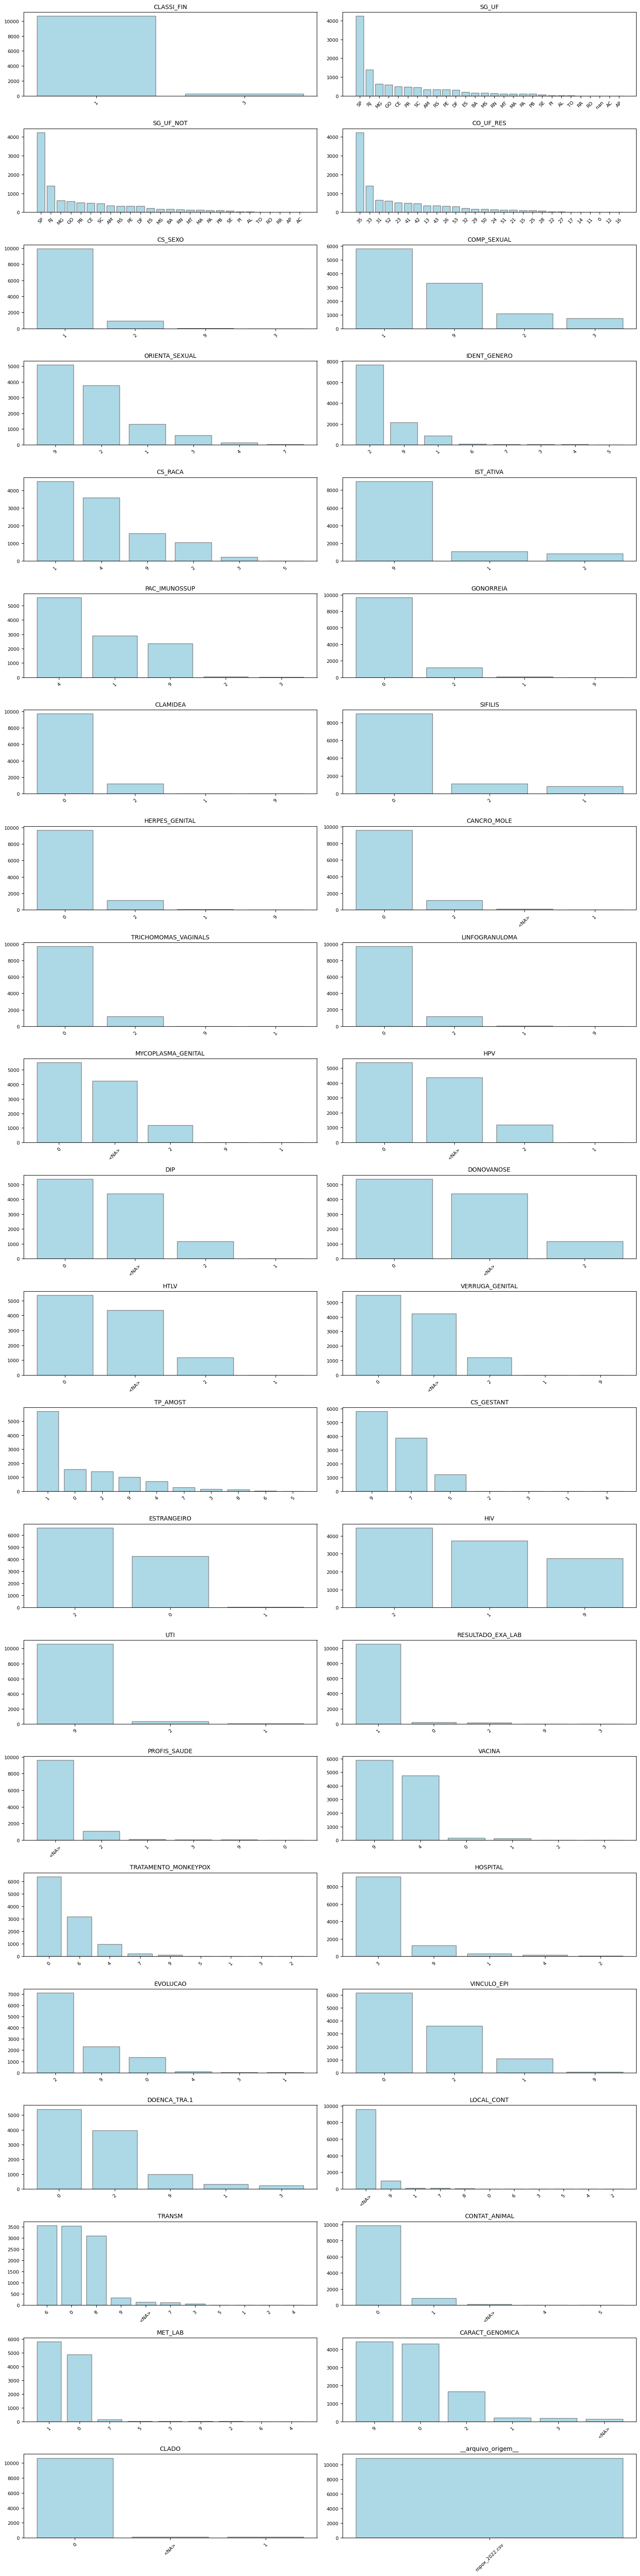

In [21]:
# 📊 EDA — Variáveis Categóricas (nominais/ordinais)
# ---------------------------------------------------
# - Objetivo: visualizar a distribuição de categorias em cada variável.
# - Inclui variáveis categóricas textuais e numéricas codificadas.
# - Variáveis com alta cardinalidade são listadas e desconsideradas dos gráficos.
# - Fonte: dataframe base_mpox (dados brutos).
# - Observação: warnings de fontes (glyphs) são ignorados apenas nesta etapa.

import warnings
#import matplotlib.pyplot as plt

# Seleciona colunas categóricas (texto + numéricas representando categorias)
cat_cols = [c for c in base_mpox.select_dtypes(include=['object', 'category', 'int64', 'Int64']).columns]

# Detecta variáveis com alta cardinalidade (exemplo: >30 categorias únicas)
high_card_cols = [c for c in cat_cols if base_mpox[c].nunique(dropna=False) > 30]

# Filtra para o plotting
plot_cols = [c for c in cat_cols if c not in high_card_cols]

# Aviso sobre variáveis desconsideradas
if high_card_cols:
    print("⚠️ Aviso: As seguintes variáveis foram desconsideradas da visualização devido à alta cardinalidade:")
    for c in high_card_cols:
        print(f" - {c} ({base_mpox[c].nunique(dropna=False)} categorias)")

# Grid de subplots
n_cols = 2
FIGSIZE = (15, 60)      # tamanho da figura
n_rows = -(-len(plot_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=FIGSIZE)
axes = axes.flatten()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Glyph.*missing from font")

    for i, col in enumerate(plot_cols):
        counts = base_mpox[col].value_counts(dropna=False)
        axes[i].bar(counts.index.astype(str), counts.values,
                    color="lightblue", edgecolor="gray")
        axes[i].set_title(col, fontsize=10)
        axes[i].tick_params(axis="x", rotation=45, labelsize=8)
        axes[i].tick_params(axis="y", labelsize=8)

    # Remove eixos extras
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

# 🔇 Suprime warnings apenas durante plt.show()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

plt.tight_layout()
plt.show()


###📊 EDA — Gráficos de barras para numéricos que representam categorias (códigos/binárias)

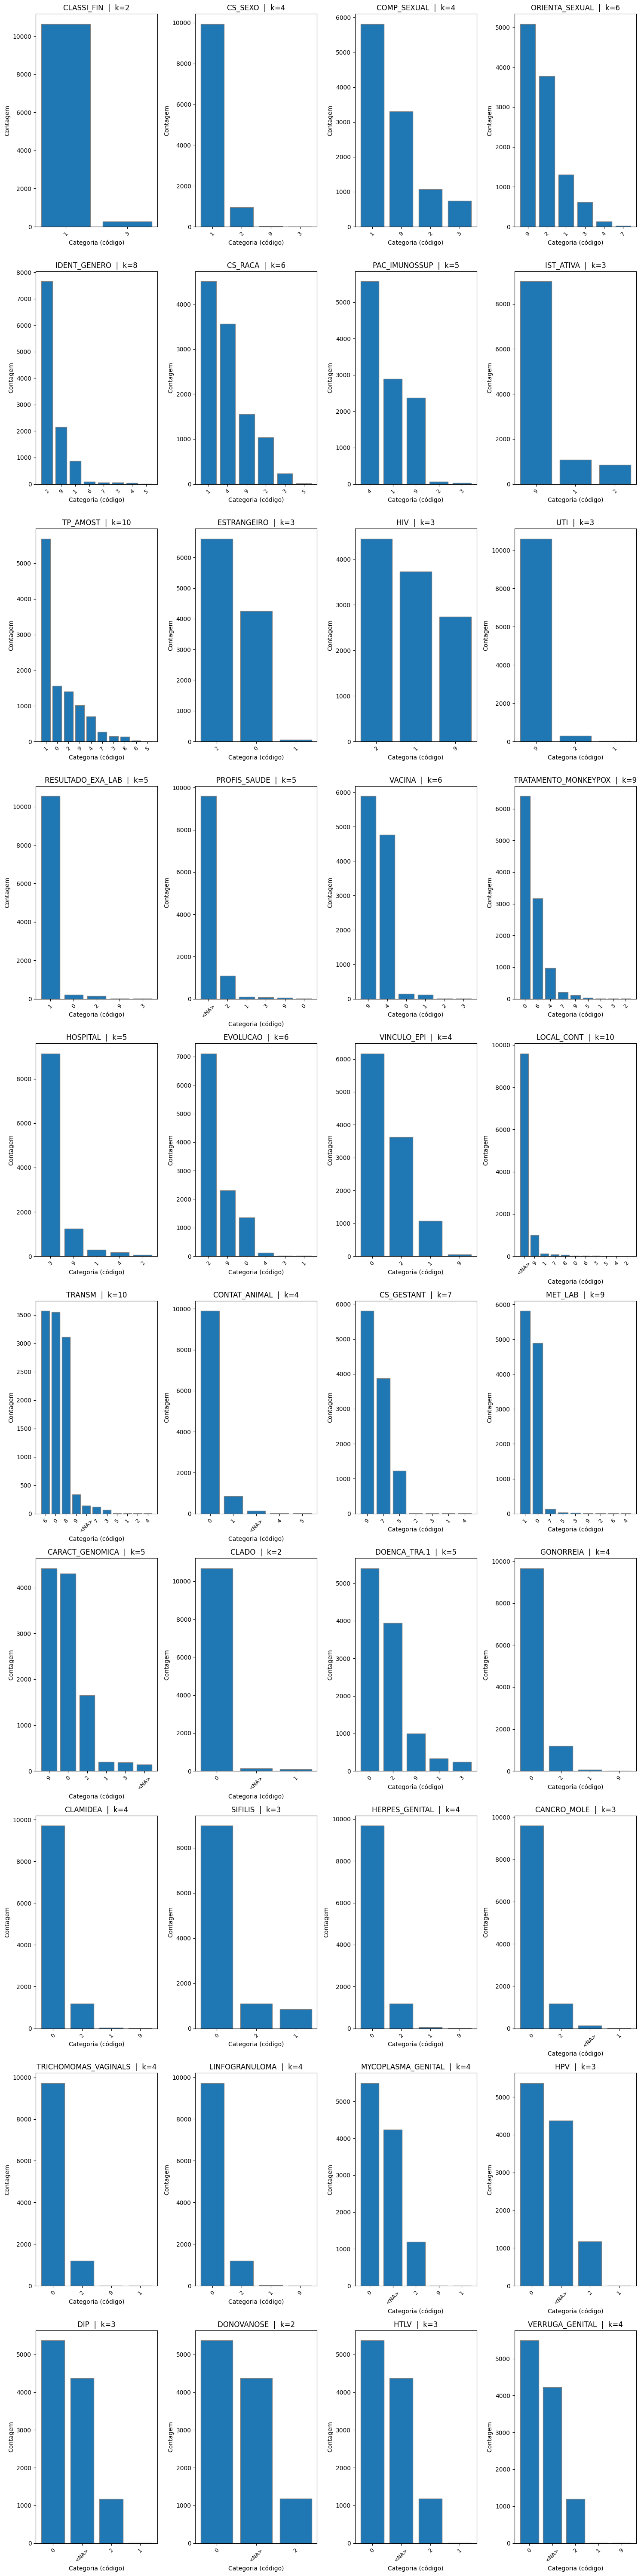

✅ Barras concluídas. Colunas plotadas: 40  |  Ignoradas por cardinalidade: 0


In [22]:
# 📊 EDA — Gráficos de barras para numéricos que representam categorias (códigos/binárias)
# ----------------------------------------------------------------------------------------
# Ideia: variáveis int/float que são, na prática, códigos de categoria (p.ex. CS_SEXO, CLASSI_FIN),
# devem ser vistas como categóricas e, portanto, inspecionadas com gráfico de barras (value_counts).
#
# Como identificar?
# - Usa teus vetores de “numéricos categóricos”: numerical_as_nominal_categ_cols e numerical_as_binary_categ_cols
# - Inclui CS_GESTANT (tratada como categórica nominal, por consenso)
#
# O snippet:
# 1) Seleciona essas colunas se existirem no dataframe;
# 2) Aplica filtro de cardinalidade (opcional) para evitar poluição visual;
# 3) Plota grid de barras (ordenado por frequência);
# 4) Suprime warnings só aqui.

#import numpy as np
#import matplotlib.pyplot as plt
import warnings

# --- parâmetros ajustáveis ---
N_COLS = 4
FIGSIZE = (15, 60)
MAX_CARD = 10   # ignora colunas com mais de 30 categorias distintas no plot (ainda listadas)
# -----------------------------

# Garante listas existentes (vêm do teu setup anterior)
num_cat_cols = []
for lst in [
    numerical_as_nominal_categ_cols,
    numerical_as_binary_categ_cols,
]:
    num_cat_cols.extend([c for c in lst if c in base_mpox.columns])

# Inclui CS_GESTANT explicitamente como categórica nominal
if 'CS_GESTANT' in base_mpox.columns and 'CS_GESTANT' not in num_cat_cols:
    num_cat_cols.append('CS_GESTANT')

num_cat_cols = list(dict.fromkeys(num_cat_cols))  # dedup

if not num_cat_cols:
    print("⚠️ Não há variáveis numéricas categóricas para plot.")
else:
    # Cardinalidade e seleção
    high_card = []
    plot_cols = []
    for c in num_cat_cols:
        nunique = base_mpox[c].dropna().nunique()
        if nunique > MAX_CARD:
            high_card.append((c, nunique))
        else:
            plot_cols.append(c)

    # Avisos de alta cardinalidade (não plotadas)
    if high_card:
        print("ℹ️ Variáveis com alta cardinalidade (não plotadas):")
        for c, k in sorted(high_card, key=lambda x: -x[1]):
            print(f"  • {c}: {k} categorias")

    if not plot_cols:
        print("⚠️ Todas as variáveis categóricas numéricas excederam o limite de cardinalidade para plot.")
    else:
        n = len(plot_cols)
        n_rows = int(np.ceil(n / N_COLS))

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            fig, axes = plt.subplots(n_rows, N_COLS, figsize=FIGSIZE)
            axes = np.array(axes).reshape(-1) if hasattr(axes, 'reshape') else np.array([axes])

            for i, col in enumerate(plot_cols):
                s = base_mpox[col]
                vc = s.value_counts(dropna=False)
                # Ordena por frequência
                vc = vc.sort_values(ascending=False)

                ax = axes[i]
                ax.bar(vc.index.astype(str), vc.values, edgecolor="gray")
                ax.set_title(f"{col}  |  k={vc.index.nunique()}")
                ax.set_xlabel("Categoria (código)")
                ax.set_ylabel("Contagem")
                ax.tick_params(axis='x', rotation=45, labelsize=9)

            # apaga eixos sobrando
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')

            # 🔇 Suprime warnings apenas durante plt.show()
            with warnings.catch_warnings():
              warnings.simplefilter("ignore")

            plt.tight_layout()
            plt.show()

    print(f"✅ Barras concluídas. Colunas plotadas: {len(plot_cols)}  |  Ignoradas por cardinalidade: {len(high_card)}")


### 📊 Resumo estatístico das variáveis numéricas reais

In [23]:
"""# 📊 Resumo estatístico das variáveis numéricas reais
# ---------------------------------------------------
# - Calcula estatísticas descritivas básicas + medidas de forma (assimetria e curtose).
# - Ajuda a identificar distribuições enviesadas e caudas pesadas.

#import pandas as pd
#from scipy.stats import skew, kurtosis
stats_summary = []

for col in num_real_cols:
    data = base_mpox[col].dropna()
    stats_summary.append({
        "Variável": col,
        "N": len(data),
        "Média": round(data.mean(), 2),
        "Mediana": round(data.median(), 2),
        "Desvio Padrão": round(data.std(), 2),
        "Mínimo": data.min(),
        "Máximo": data.max(),
        "Assimetria (skew)": round(skew(data), 2),
        "Curtose": round(kurtosis(data), 2)  # curtose > 3 → caudas pesadas
    })

stats_df = pd.DataFrame(stats_summary)
print("📌 Resumo Estatístico — Variáveis Numéricas Reais")
display(stats_df)

"""


'# 📊 Resumo estatístico das variáveis numéricas reais\n# ---------------------------------------------------\n# - Calcula estatísticas descritivas básicas + medidas de forma (assimetria e curtose).\n# - Ajuda a identificar distribuições enviesadas e caudas pesadas.\n\n#import pandas as pd\n#from scipy.stats import skew, kurtosis\nstats_summary = []\n\nfor col in num_real_cols:\n    data = base_mpox[col].dropna()\n    stats_summary.append({\n        "Variável": col,\n        "N": len(data),\n        "Média": round(data.mean(), 2),\n        "Mediana": round(data.median(), 2),\n        "Desvio Padrão": round(data.std(), 2),\n        "Mínimo": data.min(),\n        "Máximo": data.max(),\n        "Assimetria (skew)": round(skew(data), 2),\n        "Curtose": round(kurtosis(data), 2)  # curtose > 3 → caudas pesadas\n    })\n\nstats_df = pd.DataFrame(stats_summary)\nprint("📌 Resumo Estatístico — Variáveis Numéricas Reais")\ndisplay(stats_df)\n\n'

### 📊 EDA — Boxplots de variáveis numéricas

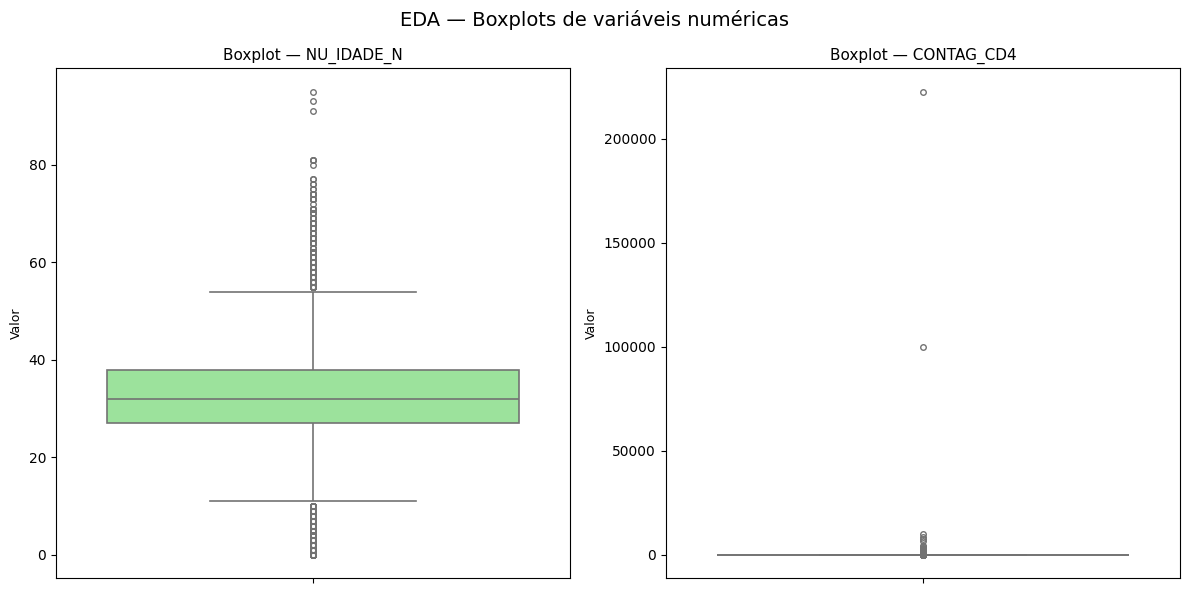

In [24]:
# 📊 EDA — Boxplots de variáveis numéricas
# ----------------------------------------
# - Objetivo: identificar outliers e dispersão das variáveis numéricas contínuas.
# - Inclui apenas variáveis numéricas de fato (não-categóricas).
# - Cada variável terá um boxplot independente.
# - Warnings visuais (glyphs, fontes) são ignorados apenas nesta etapa.

#import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings

# Suprime warnings apenas durante os gráficos
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Seleção: apenas numéricas contínuas/discretas (já definidas nos vetores)
    num_cols = [c for c in numerical_discrete_cols if c in base_mpox.columns]

    # Layout dinâmico (até 2 colunas)
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

    # Garante que axes seja sempre iterável como array 1D
    if isinstance(axes, plt.Axes):
        axes = [axes]
    else:
        axes = axes.ravel()

    for ax, col in zip(axes, num_cols):
        sns.boxplot(y=base_mpox[col], ax=ax, color="lightgreen", fliersize=4, linewidth=1.2)
        ax.set_title(f"Boxplot — {col}", fontsize=11)
        ax.set_ylabel("Valor", fontsize=9)

    # Remove eixos extras (se sobrar espaço no grid)
    for ax in axes[len(num_cols):]:
        fig.delaxes(ax)

    plt.suptitle("EDA — Boxplots de variáveis numéricas", fontsize=14)
    plt.tight_layout()
    plt.show()


### 📊 EDA — Heatmap de Correlação (variáveis numéricas reais)

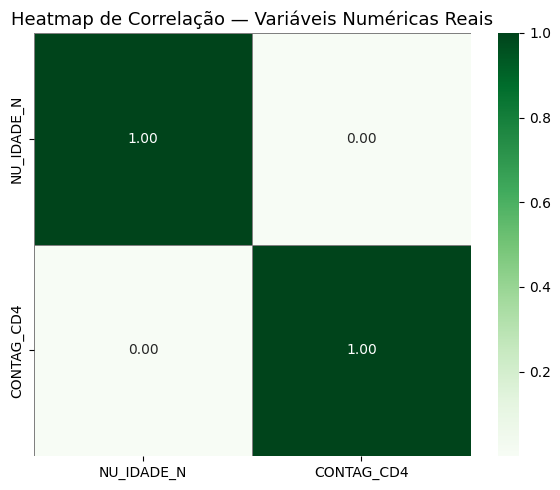

In [25]:
# 📊 EDA — Heatmap de Correlação (variáveis numéricas reais)
# ---------------------------------------------------------
# - Objetivo: visualizar correlação linear entre variáveis numéricas reais (contínuas/discretas).
# - Inclui apenas variáveis como idade (NU_IDADE_N) e contagem CD4 (CONTAG_CD4).
# - Diagnóstico: identificar redundância ou relações clínicas relevantes.
# - Obs: nesta fase NÃO removemos nada, apenas exploramos visualmente.

#import matplotlib.pyplot as plt
#import seaborn as sns
import warnings

# Suprime warnings só durante o gráfico
warnings.filterwarnings("ignore")

# Seleciona apenas numéricas reais
num_reais = ['NU_IDADE_N', 'CONTAG_CD4']
num_reais = [c for c in num_reais if c in base_mpox.columns]

plt.figure(figsize=(6, 5))
sns.heatmap(
    base_mpox[num_reais].corr(method="pearson"),
    annot=True, fmt=".2f", cmap="Greens", cbar=True,
    linewidths=0.5, linecolor="gray"
)
plt.title("Heatmap de Correlação — Variáveis Numéricas Reais", fontsize=13)
plt.tight_layout()
plt.show()

# Restaura warnings
#warnings.resetwarnings()


### 📊 EDA — Pairplot de Variáveis Numéricas Reais

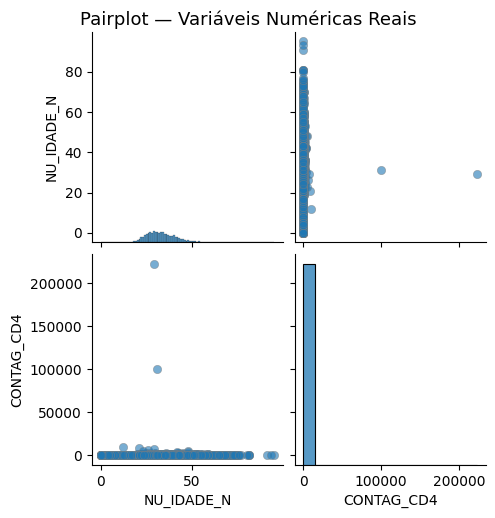

In [26]:
# 📊 EDA — Pairplot de Variáveis Numéricas Reais
# -----------------------------------------------
# - Objetivo: visualizar distribuições e dispersões conjuntas entre variáveis numéricas reais.
# - Inclui NU_IDADE_N (idade) e CONTAG_CD4 (imunidade).
# - Ajuda a observar dispersão, outliers e padrões clínicos.

#import seaborn as sns
#import matplotlib.pyplot as plt
import warnings

# Suprime warnings apenas durante os gráficos
warnings.filterwarnings("ignore")

num_reais = ['NU_IDADE_N', 'CONTAG_CD4']
num_reais = [c for c in num_reais if c in base_mpox.columns]

sns.pairplot(base_mpox[num_reais], diag_kind="hist", plot_kws={"alpha":0.6, "edgecolor":"gray"})
plt.suptitle("Pairplot — Variáveis Numéricas Reais", y=1.02, fontsize=13)
plt.show()

# Restaura warnings
#warnings.resetwarnings()


---

## **Pré-processamento → deixa os dados consistentes, limpos e completos.**

---

### **Atividade 1: Limpeza de Dados Incorretos**
- Identificar valores numéricos inválidos, por exemplo, idades em < 0, data acima da data atual ou zero, preços absurdos, etc

   (Aqui também será feito consolidação de valores categóricos que são sinônimos)
- Remover ou corrigir essas entradas

#### Limpa dados

In [27]:
## 🧽 Limpeza de dados (recodificações + coerências de negócio)
df_typefix = base_mpox.copy()

# 1) Recodificações de códigos fora do dicionário
#   - 0/3 conforme regras validadas
if 'TP_AMOST' in base_mpox.columns:
    base_mpox['TP_AMOST'] = base_mpox['TP_AMOST'].replace({0:9})
if 'MET_LAB' in base_mpox.columns:
    base_mpox['MET_LAB'] = base_mpox['MET_LAB'].replace({0:9})
if 'CARACT_GENOMICA' in base_mpox.columns:
    base_mpox['CARACT_GENOMICA'] = base_mpox['CARACT_GENOMICA'].replace({0:9, 3:9})
if 'CLADO' in base_mpox.columns:
    base_mpox['CLADO'] = base_mpox['CLADO'].replace({0:9})
if 'TRATAMENTO_MONKEYPOX' in base_mpox.columns:
    base_mpox['TRATAMENTO_MONKEYPOX'] = base_mpox['TRATAMENTO_MONKEYPOX'].replace({0:4, 9:4})
if 'LOCAL_CONT' in base_mpox.columns:
    base_mpox['LOCAL_CONT'] = base_mpox['LOCAL_CONT'].replace({0:9})
if 'TRANSM' in base_mpox.columns:
    base_mpox['TRANSM'] = base_mpox['TRANSM'].replace({0:8})
if 'CONTAT_ANIMAL' in base_mpox.columns:
    base_mpox['CONTAT_ANIMAL'] = base_mpox['CONTAT_ANIMAL'].replace({0:5, 9:5})
if 'DOENCA_TRA.1' in base_mpox.columns:
    mask_ood = ~base_mpox['DOENCA_TRA.1'].isin([1,2,9]) & base_mpox['DOENCA_TRA.1'].notna()
    base_mpox.loc[mask_ood, 'DOENCA_TRA.1'] = 9

# 2) Binárias ISTs: 2/9/vazio → 0, e coerência com IST_ATIVA
for c in binarias_ist:
    if c in base_mpox.columns:
        base_mpox[c] = base_mpox[c].replace({2:0, 9:0}).fillna(0).astype('Int64')

if 'IST_ATIVA' in base_mpox.columns:
    mask_inativa = base_mpox['IST_ATIVA'] != 1
    cols_exist = [c for c in binarias_ist if c in base_mpox.columns]
    base_mpox.loc[mask_inativa, cols_exist] = 0

# 3) CS_GESTANT: domínio + coerência com CS_SEXO
if 'CS_GESTANT' in base_mpox.columns:
    valid = {1,2,3,4,5,7,9}
    mask_ood = ~base_mpox['CS_GESTANT'].isin(valid) & base_mpox['CS_GESTANT'].notna()
    base_mpox.loc[mask_ood, 'CS_GESTANT'] = 9

    if 'CS_SEXO' in base_mpox.columns:
        base_mpox['CS_SEXO'] = to_Int64(base_mpox['CS_SEXO'])
        mask_not_fem = base_mpox['CS_SEXO'].fillna(9) != 2
        mask_tri = base_mpox['CS_GESTANT'].isin([1,2,3,4])
        base_mpox['cs_gestant_incoerente'] = (mask_not_fem & mask_tri)

# 4) NU_IDADE_N: flag de outliers
if 'NU_IDADE_N' in base_mpox.columns:
    base_mpox['idade_outlier'] = base_mpox['NU_IDADE_N'].notna() & (
        (base_mpox['NU_IDADE_N'] < 0) | (base_mpox['NU_IDADE_N'] > 110)
    )

# 5) CONTAG_CD4: flag de outliers
# ---------------------------------------------------------
# - Define como outliers os valores negativos e os acima do limiar clínico (outlier_threshold_max).
# - Regra baseada em consensos médicos: valores normais variam até ~1500 células/µL,
#   aceitando exceções até o limite técnico (~3000). Acima disso é considerado inconsistente.
# ---------------------------------------------------------

if "CONTAG_CD4" in base_mpox.columns:
    base_mpox["cd4_outlier"] = base_mpox["CONTAG_CD4"].notna() & (
        (base_mpox["CONTAG_CD4"] < 0) | (base_mpox["CONTAG_CD4"] > outlier_threshold_max)
    )

#debug# print ("CONTAG_CD4: outlier_threshold_max = ", outlier_threshold_max)
print("\n✔️ Limpeza aplicada (recodes + regras de negócio + flags de outliers).\n")



✔️ Limpeza aplicada (recodes + regras de negócio + flags de outliers).



### 🔎 Auditoria Pós-limpeza de Dados

In [28]:
## 🔎 Auditoria pós-limpeza de dados

# 1) Checagem ISTs após recodificação
if 'IST_ATIVA' in base_mpox.columns:
    ist_cols_exist = [c for c in binarias_ist if c in base_mpox.columns]
    if len(ist_cols_exist) == 0:
        print("ℹ️ Nenhuma coluna IST específica encontrada para checar.")
    else:
        mask_inativa = base_mpox['IST_ATIVA'] != 1
        ist_subset = base_mpox.loc[mask_inativa, ist_cols_exist].fillna(0)
        # Linhas com qualquer IST ativa quando IST_ATIVA ≠ 1
        viol = (ist_subset.sum(axis=1) > 0).sum()
        if viol > 0:
            print(f"⚠️ {int(viol)} registros com ISTs ativas apesar de IST_ATIVA ≠ 1.")
            # (Opcional) Mostrar top colunas que mais violam
            viol_cols = ist_subset.sum(axis=0).sort_values(ascending=False)
            print("   Colunas com mais violações:\n", viol_cols[viol_cols > 0])
        else:
            print("✔️ Coerência ISTs verificada (IST_ATIVA ≠ 1 ⇒ todas ISTs = 0).")
else:
    print("ℹ️ IST_ATIVA não está no dataframe — auditoria de ISTs pulada.")

# 2) Checagem NU_IDADE_N
if 'NU_IDADE_N' in base_mpox.columns and 'idade_outlier' in base_mpox.columns:
    out = int(base_mpox['idade_outlier'].sum())
    print(f"⚠️ {out} registros com idade fora do intervalo plausível (<0 ou >110).") if out > 0 else print("✔️ Idades plausíveis.")
else:
    print("ℹ️ Flag 'idade_outlier' não encontrada — pula checagem de idade.")

# 3) Checagem CS_GESTANT × CS_SEXO
if 'CS_GESTANT' in base_mpox.columns and 'cs_gestant_incoerente' in base_mpox.columns:
    incoer = int(base_mpox['cs_gestant_incoerente'].sum())
    print(f"⚠️ {incoer} registros incoerentes (trimestre em não-femininos).") if incoer > 0 else print("✔️ CS_GESTANT coerente com CS_SEXO.\n")
else:
    print("ℹ️ Flag 'cs_gestant_incoerente' não encontrada — pula checagem de coerência gestante/sexo.\n")


✔️ Coerência ISTs verificada (IST_ATIVA ≠ 1 ⇒ todas ISTs = 0).
✔️ Idades plausíveis.
✔️ CS_GESTANT coerente com CS_SEXO.



### 📊 Boxplot — CONTAG_CD4 pós-limpeza

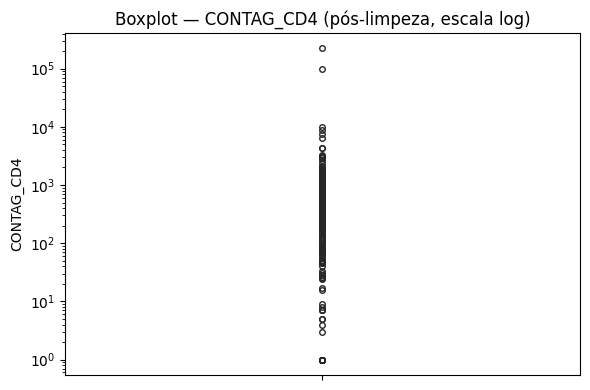

In [29]:
# 📊 Boxplot — CONTAG_CD4 pós-limpeza
# ---------------------------------------------------
# - Objetivo: visualizar outliers residuais após limpeza.
# - Eixo Y em escala log para evidenciar dispersão extrema.
# - Útil para reforçar diagnóstico complementar ao histograma.

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.figure(figsize=(6,4))
sns.boxplot(y=base_mpox["CONTAG_CD4"], color="green", fliersize=4, linewidth=1.2)
plt.yscale("log")
plt.title("Boxplot — CONTAG_CD4 (pós-limpeza, escala log)")

# 🔇 Suprime warnings apenas durante plt.show()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.tight_layout()
    plt.show()


### 📊 Auditoria visual — Binárias recodificadas (0/1)

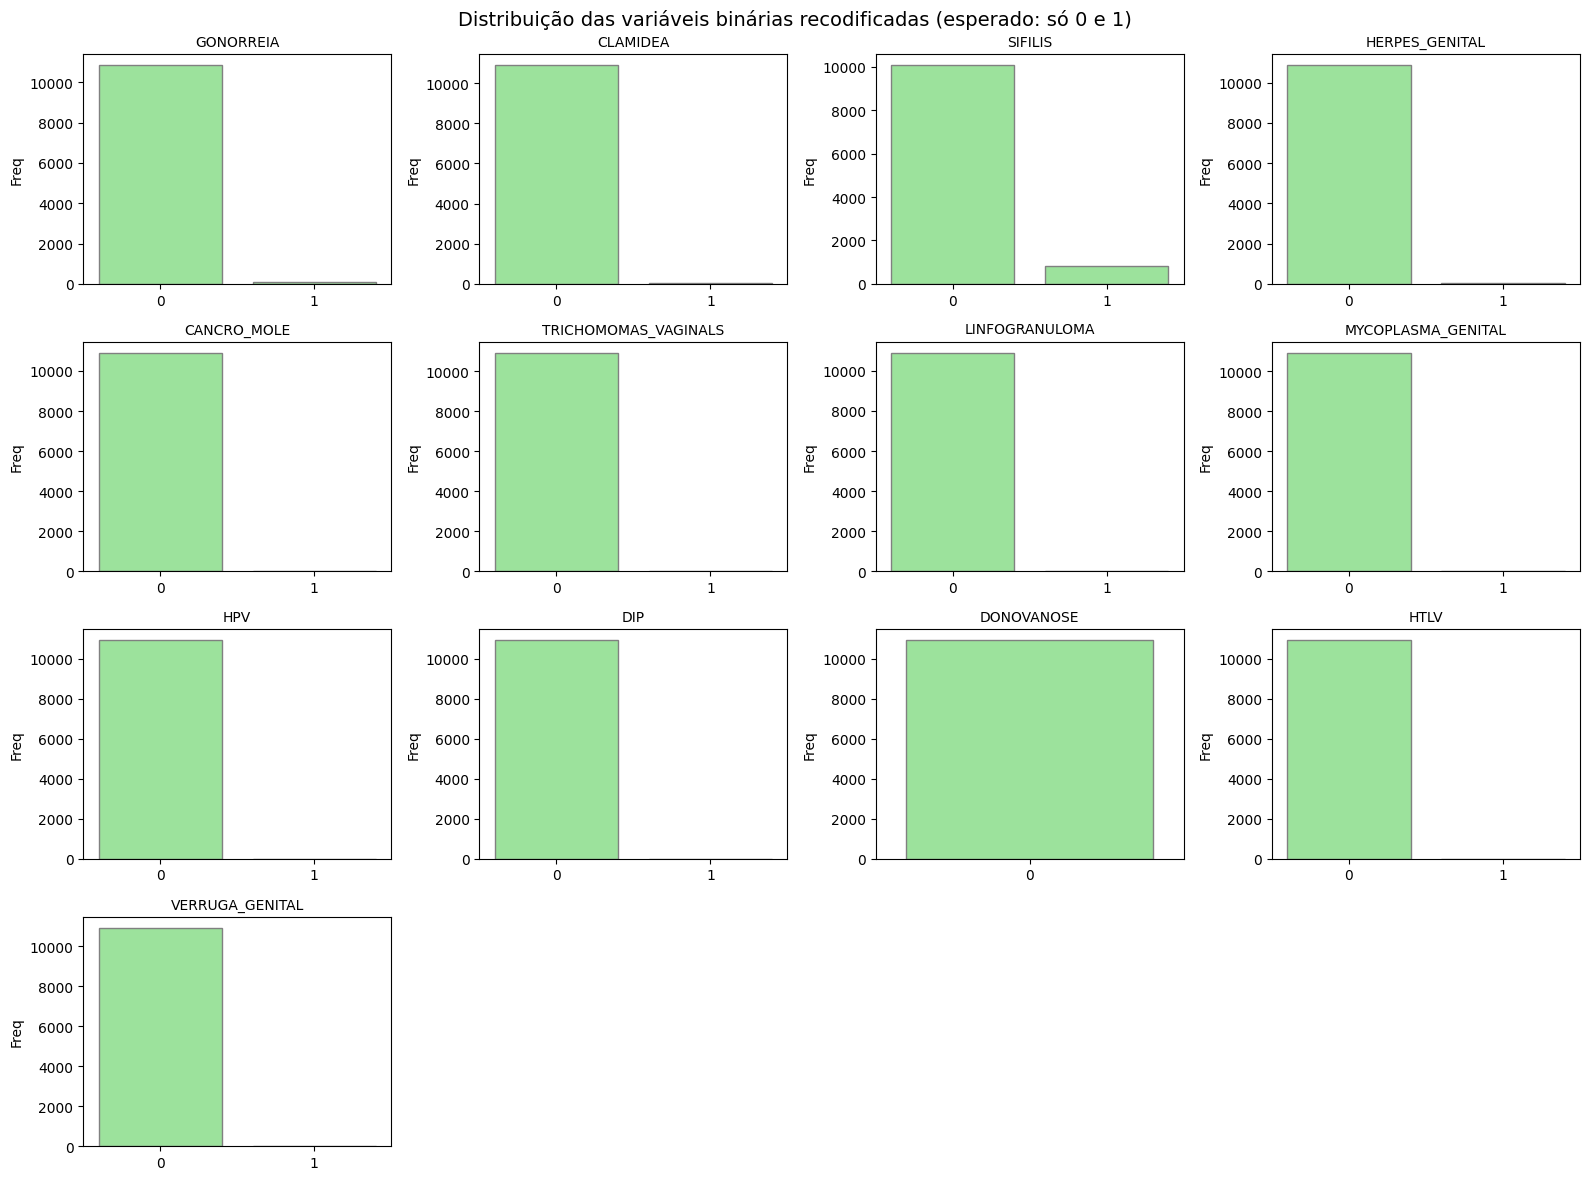

In [30]:
# 📊 Auditoria visual — Binárias recodificadas (0/1)
# ---------------------------------------------------
# - Objetivo: verificar graficamente se, após limpeza/recodificação,
#   todas as variáveis binárias estão restritas a {0,1}.
# - Método: barplots lado a lado para cada coluna binária.
# - Obs: valores inesperados (ex: 2, 9, NaN) aparecerão como barras extras.

#import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings

bin_cols = [c for c in numerical_as_binary_categ_cols if c in base_mpox.columns]

ncols = 4
nrows = -(-len(bin_cols) // ncols)  # ceil division

with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # 👈 Suprime warnings só aqui

    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, bin_cols):
        sns.countplot(x=base_mpox[col], ax=ax, color="lightgreen", edgecolor="gray")
        ax.set_title(col, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Freq")

    # Remove eixos vazios se sobrar espaço
    for ax in axes[len(bin_cols):]:
        ax.axis("off")

    plt.suptitle("Distribuição das variáveis binárias recodificadas (esperado: só 0 e 1)", fontsize=14)
    plt.tight_layout()
    plt.show()


### Salva Dados Pós-limpeza em .csv (_#debug#_)
  Neste caso, pode-se notar, se houver, que os dados faltantes foram preenchidos, conforme técnica aplicada a cada variável.

In [31]:
df_clean = base_mpox.copy()
Base_csv_file = 'mpox_2022_clean.csv'

#debug#
df_clean.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

### 📌 Nota da seção – Dataset após limpeza

- `df_clean` → dataset derivado de `df_raw`, com as seguintes correções:  
  - Remoção de idades inválidas (< 0).  
  - Remoção de datas futuras/inconsistentes.  
  - Ajustes em registros duplicados ou incoerentes.  
- Este dataframe é a **base de referência confiável**, livre de entradas inválidas.


### **Atividade 2: Imputação de valores faltantes**
- Identificar valores faltantes: NaN e ?
- Usar as técnicas: média e moda

#### Levanta os dados faltantes

In [32]:
#import numpy as np

# Definições extras de "faltantes" além de NaN/NaT
faltantes_extras = ["?", "NA", "N/A", "null", "vazio", " "]

def levantamento_faltantes(df, extras=faltantes_extras):
    report = []

    for col in df.columns:
        total = len(df)

        # Contagem de NaN / None / NaT
        n_null = df[col].isna().sum()

        # Contagem de valores extras (strings ou equivalentes)
        n_extras = df[col].isin(extras).sum() if df[col].dtype == "object" else 0

        # Total de faltantes
        n_total = n_null + n_extras
        perc = n_total / total if total > 0 else 0

        if n_total > 0:
            report.append({
                "Variável": col,
                "Total registros": total,
                "Faltantes (NaN/NaT/None)": n_null,
                "Faltantes extras": n_extras,
                "Faltantes total": n_total,
                "Faltantes (%)": f"{perc:.1%}"
            })

    return pd.DataFrame(report).sort_values(by="Faltantes (%)", ascending=False)

# 🔎 Rodar diagnóstico
df_faltantes = levantamento_faltantes(base_mpox)
print(df_faltantes)


           Variável  Total registros  Faltantes (NaN/NaT/None)  \
8        DT_INTERNA            10920                     10402   
7         OUTRO_DES            10920                     10054   
9       DT_EVOLUCAO            10920                      9932   
4      PROFIS_SAUDE            10920                      9594   
10       LOCAL_CONT            10920                      9594   
..              ...              ...                       ...   
12    CONTAT_ANIMAL            10920                       143   
13  CARACT_GENOMICA            10920                       143   
14            CLADO            10920                       143   
1        DT_SIN_PRI            10920                        52   
0             SG_UF            10920                         4   

    Faltantes extras  Faltantes total Faltantes (%)  
8                  0            10402         95.3%  
7                  0            10054         92.1%  
9                  0             9932        

#### Imputa dados

In [33]:
# ============================================================
# IMPUTAÇÃO + AUDITORIA (bloco sequencial, pronto para rodar)
# Regra 5/20/40; Datas NÃO são imputadas; cria *_missing
# ============================================================

# import pandas as pd
# import numpy as np

# ---------- Validadores mínimos (garante que vetores e DF existem) ----------
_required = [
    "base_mpox",
    "nominal_categorical_cols",
    "list_multiple_categorical_cols",
    "text_cols",
    "numerical_as_binary_categ_cols",
    "numerical_as_nominal_categ_cols",
    "numerical_discrete_cols",
    "date_temporal_cols",
]
_missing = [name for name in _required if name not in globals()]
if _missing:
    raise NameError(f"As seguintes variáveis precisam estar definidas antes deste bloco: {_missing}")

# ---------- Helpers ----------
def _safe_mode(s: pd.Series):
    m = s.mode(dropna=True)
    return (None if m.empty else m.iloc[0])

def _coerce_int64_nullable(s: pd.Series):
    return pd.to_numeric(s, errors='coerce').astype('Int64')

def _coerce_numeric(s: pd.Series):
    return pd.to_numeric(s, errors='coerce')

def _coerce_datetime(s: pd.Series):
    return pd.to_datetime(s, errors='coerce', dayfirst=True)

# ---------- 1) IMPUTAÇÃO ESTRATÉGICA (5/20/40) ----------
def imputar_estrategico(
    df,
    *,
    nominal_categorical_cols,
    list_multiple_categorical_cols,
    text_cols,
    numerical_as_binary_categ_cols,
    numerical_as_nominal_categ_cols,
    numerical_discrete_cols,
    date_temporal_cols,
    cutoff_baixo=0.05,        # <5%
    cutoff_moderado=0.20,     # 5–20%
    impute_on_moderate=True,  # 5–20% → imputar + flag
    numeric_use_median=True,  # numéricas: Mediana (True) ou Média (False)
    impute_dates=False,       # DATAS: manter NaT (não imputar)
    create_missing_indicators=True,
    missing_suffix="_missing"
):
    """
    Estratégia:
      - <5%        → imputar
      - 5–20%      → imputar + flag (se impute_on_moderate=True)
      - 20–40%     → avaliar; aqui mantemos regra conservadora: flag e (opcional) imputar
      - >40%       → não imputar; apenas flag
      - DATAS      → por design NÃO imputar; manter NaT + flag
      - TEXTO livre→ substituir NaN por "" (nada a declarar) + flag
    Retorna: df_imputado, report (dict por coluna com ação/valor)
    """
    df = df.copy()
    report = {}

    def choose_action(frac):
        if frac < cutoff_baixo:
            return "impute"
        elif frac < cutoff_moderado:
            return "impute+flag" if impute_on_moderate else "flag_only"
        elif frac < 0.40:
            # conservador: preferir flag; imputação opcional conforme caso
            return "flag_only"
        else:
            return "flag_only"

    def add_flag(col, mask_missing):
        if create_missing_indicators and col in df.columns:
            df[f"{col}{missing_suffix}"] = mask_missing.astype('Int64')

    # 1. Categóricas nominais (texto/IBGE)
    for col in [c for c in nominal_categorical_cols if c in df.columns]:
        if df[col].dtype == object:
            miss_mask = df[col].isna()
            frac = miss_mask.mean()
            action = choose_action(frac)
            moda = None
            n_imp = 0
            if action in ("impute","impute+flag"):
                moda = _safe_mode(df[col])
                if moda is not None:
                    n_before = miss_mask.sum()
                    df[col] = df[col].fillna(moda)
                    n_imp = int(n_before - df[col].isna().sum())
                else:
                    action = "flag_only"
            add_flag(col, miss_mask)
            report[col] = {"grupo":"cat_nom_texto","missing_frac":float(frac),
                           "action":action,"value":moda,"imputed":n_imp}
        else:
            df[col] = _coerce_int64_nullable(df[col])
            miss_mask = df[col].isna()
            frac = miss_mask.mean()
            action = choose_action(frac)
            moda = None
            n_imp = 0
            if action in ("impute","impute+flag"):
                moda = _safe_mode(df[col])
                if moda is not None:
                    n_before = miss_mask.sum()
                    df[col] = df[col].fillna(moda).astype('Int64')
                    n_imp = int(n_before - df[col].isna().sum())
                else:
                    action = "flag_only"
            add_flag(col, miss_mask)
            report[col] = {"grupo":"cat_nom_codigo","missing_frac":float(frac),
                           "action":action,"value":moda,"imputed":n_imp}

    # 2. Lista múltipla (SINTOMA): NaN → "" (nada a declarar) + flag
    for col in [c for c in list_multiple_categorical_cols if c in df.columns]:
        miss_mask = df[col].isna()
        n_before = miss_mask.sum()
        df[col] = df[col].fillna("")
        add_flag(col, miss_mask)
        report[col] = {"grupo":"lista_texto","missing_frac":float(miss_mask.mean()),
                       "action":"fill_empty_string","value":"","imputed":int(n_before)}

    # 3. Texto livre: NaN → "" (nada a declarar) + flag
    for col in [c for c in text_cols if c in df.columns]:
        miss_mask = df[col].isna()
        n_before = miss_mask.sum()
        df[col] = df[col].fillna("")
        add_flag(col, miss_mask)
        report[col] = {"grupo":"texto_livre","missing_frac":float(miss_mask.mean()),
                       "action":"fill_empty_string","value":"","imputed":int(n_before)}

    # 4. Binárias (0/1): moda
    for col in [c for c in numerical_as_binary_categ_cols if c in df.columns]:
        df[col] = _coerce_int64_nullable(df[col])
        miss_mask = df[col].isna()
        frac = miss_mask.mean()
        action = choose_action(frac)
        moda = None
        n_imp = 0
        if action in ("impute","impute+flag"):
            moda = _safe_mode(df[col])
            if moda is not None:
                n_before = miss_mask.sum()
                df[col] = df[col].fillna(moda).astype('Int64')
                n_imp = int(n_before - df[col].isna().sum())
            else:
                action = "flag_only"
        add_flag(col, miss_mask)
        report[col] = {"grupo":"binaria","missing_frac":float(frac),
                       "action":action,"value":moda,"imputed":n_imp}

    # 5. Categóricas nominais (numéricas/códigos): moda
    for col in [c for c in numerical_as_nominal_categ_cols if c in df.columns]:
        df[col] = _coerce_int64_nullable(df[col])
        miss_mask = df[col].isna()
        frac = miss_mask.mean()
        action = choose_action(frac)
        moda = None
        n_imp = 0
        if action in ("impute","impute+flag"):
            moda = _safe_mode(df[col])
            if moda is not None:
                n_before = miss_mask.sum()
                df[col] = df[col].fillna(moda).astype('Int64')
                n_imp = int(n_before - df[col].isna().sum())
            else:
                action = "flag_only"
        add_flag(col, miss_mask)
        report[col] = {"grupo":"cat_nom_num","missing_frac":float(frac),
                       "action":action,"value":moda,"imputed":n_imp}

    # 6. Numéricas reais/discretas: Mediana (ou Média)
    for col in [c for c in numerical_discrete_cols if c in df.columns]:
        s = _coerce_numeric(df[col])
        # Regra clínica CD4: negativos → NaN
        if col.upper() == "CONTAG_CD4":
            s = s.mask(s < 0, np.nan)

        miss_mask = s.isna()
        frac = miss_mask.mean()
        action = choose_action(frac)
        val = None
        n_imp = 0
        if action in ("impute","impute+flag"):
            val = (s.median(skipna=True) if numeric_use_median else s.mean(skipna=True))
            if pd.notna(val):
                n_before = miss_mask.sum()
                s = s.fillna(val)
                n_imp = int(n_before - s.isna().sum())
            else:
                action = "flag_only"
        # dtype final
        if (s.dropna() % 1 == 0).all():
            df[col] = s.round().astype('Int64')
        else:
            df[col] = s.astype(float)

        add_flag(col, miss_mask)
        report[col] = {"grupo":"numerica","missing_frac":float(frac),
                       "action":action,"value":(float(val) if val is not None else None),
                       "imputed":n_imp}

    # 7. Datas: NUNCA imputar; manter NaT + flag
    for col in [c for c in date_temporal_cols if c in df.columns]:
        dt = _coerce_datetime(df[col])
        miss_mask = dt.isna()
        frac = miss_mask.mean()
        # por design:
        action = "flag_only"
        df[col] = dt
        add_flag(col, miss_mask)
        report[col] = {"grupo":"data","missing_frac":float(frac),
                       "action":action,"value":None,"imputed":0}

    return df, report



# ---------- 2) AUDITORIA (apenas variáveis com faltantes; transposta) ----------
def auditar_imputacao_faltantes(df_before, df_after, report, transpose=True):
    """
    Mostra só variáveis que tinham faltantes no BEFORE.
    Colunas: % antes/depois, ação, valor imputado, estratégia (derivada do grupo).
    """
    audit = []
    n = len(df_before)

    for col, info in report.items():
        if col not in df_before.columns:
            continue
        before_na = df_before[col].isna().sum()
        after_na  = df_after[col].isna().sum() if col in df_after.columns else np.nan
        if before_na == 0:
            continue

        grupo = info.get("grupo", "")
        if grupo in ("cat_nom_texto","cat_nom_codigo","cat_nom_num","binaria"):
            estrategia = "Moda"
        elif grupo == "numerica":
            estrategia = "Mediana"
        elif grupo == "data":
            estrategia = "Não imputada (NaT)"
        elif grupo in ("lista_texto","texto_livre"):
            estrategia = '"" (nada a declarar)'
        else:
            estrategia = "-"

        audit.append({
            "Variável": col,
            "% antes": round(before_na / n * 100, 2),
            "% depois": round(after_na / n * 100, 2),
            "Ação": info.get("action","-"),
            "Valor imputado": info.get("value","-"),
            "Estratégia": estrategia
        })

    audit_df = pd.DataFrame(audit).set_index("Variável")
    return audit_df.T if transpose else audit_df





# ---------- 3) EXECUÇÃO (imputação → auditoria) ----------
df_prep, report = imputar_estrategico(
    base_mpox,
    nominal_categorical_cols=nominal_categorical_cols,
    list_multiple_categorical_cols=list_multiple_categorical_cols,
    text_cols=text_cols,
    numerical_as_binary_categ_cols=numerical_as_binary_categ_cols,
    numerical_as_nominal_categ_cols=numerical_as_nominal_categ_cols,
    numerical_discrete_cols=numerical_discrete_cols,
    date_temporal_cols=date_temporal_cols,
    cutoff_baixo=0.05,        # 5%
    cutoff_moderado=0.20,     # 20%
    impute_on_moderate=True,  # 5–20%: imputar + flag
    numeric_use_median=True,  # numéricas → Mediana
    impute_dates=False,       # DATAS: manter NaT
    create_missing_indicators=True
)

print("✔️ Imputação concluída.")
print("Shape (Linhas, Colunas) antes:", base_mpox.shape, " | depois:", df_prep.shape, '\n')

audit_imp_faltantes = auditar_imputacao_faltantes(
    base_mpox, df_prep, report, transpose=True
)

✔️ Imputação concluída.
Shape (Linhas, Colunas) antes: (10920, 59)  | depois: (10920, 114) 



### 📊 Interpretação

- Nenhum registro foi removido (mesmo número de linhas).

- O aumento de colunas é devido à criação de indicadores de faltantes (_missing indicators_) a qual significa que, além de imputar valores, o pipeline preservou a informação sobre o fato de o dado ser originalmente ausente, algo essencial em epidemiologia e machine learning, já que "essa ausência de dados" pode ser, em si, uma variável preditiva relevante.

### 🔎 Auditoria Pós-Imputação de Dados

In [34]:
# Exibir relatório enxuto (só variáveis que tinham faltantes)
audit_imp_faltantes

Variável,SG_UF,SINTOMA,OUTRO_DES,PROFIS_SAUDE,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,CARACT_GENOMICA,CLADO,CONTAG_CD4,DT_SIN_PRI,DT_COLETA,DATA_VACINA,DT_INTERNA,DT_EVOLUCAO
% antes,0.04,1.58,92.07,87.86,87.86,1.31,1.31,1.31,1.31,10.41,0.48,13.17,100.0,95.26,90.95
% depois,0.0,0.0,0.0,87.86,87.86,0.0,0.0,0.0,0.0,0.0,0.48,13.17,100.0,95.26,90.95
Ação,impute,fill_empty_string,fill_empty_string,flag_only,flag_only,impute,impute,impute,impute,impute+flag,flag_only,flag_only,flag_only,flag_only,flag_only
Valor imputado,SP,,,None,None,8,5,9,9,0.0,None,None,None,None,None
Estratégia,Moda,""""" (nada a declarar)",""""" (nada a declarar)",Moda,Moda,Moda,Moda,Moda,Moda,Mediana,Não imputada (NaT),Não imputada (NaT),Não imputada (NaT),Não imputada (NaT),Não imputada (NaT)


### Verificação de Dados Faltantes

O DataFrame passou por uma etapa rigorosa de limpeza e imputação, e atualmente não apresenta dados faltantes em variáveis críticas para análise.

**Nota:** Algumas células permanecem com valores ausentes por decisão metodológica, conforme recomendado na literatura especializada. Essas ausências foram mantidas intencionalmente para preservar a integridade estatística dos dados e evitar distorções nos modelos preditivos.

##### Levanta os dados faltantes

In [35]:
# Verifica se há '?' em cada coluna
(df_prep == '?').sum()[ (df_prep == '?').sum() > 0 ].to_frame(name='interrogacoes').T

""
interrogacoes


In [36]:
df_prep.isnull().sum()[df_prep.isnull().sum() > 0].to_frame(name='nulos').T

,DT_SIN_PRI,DT_COLETA,PROFIS_SAUDE,DATA_VACINA,DT_INTERNA,DT_EVOLUCAO,LOCAL_CONT
nulos,52,1438,9594,10920,10402,9932,9594


In [37]:
df_prep.isna().sum()[df_prep.isna().sum() > 0].to_frame(name='nulos').T

,DT_SIN_PRI,DT_COLETA,PROFIS_SAUDE,DATA_VACINA,DT_INTERNA,DT_EVOLUCAO,LOCAL_CONT
nulos,52,1438,9594,10920,10402,9932,9594


## 📌 Nota da seção – Dataset após Imputação/Pré-processamento

- `df_prep` → dataset derivado de `df_clean`, com os valores faltantes tratados.  
- Estratégias aplicadas a variáveis:  
  - Numéricas → imputação pela **mediana**.  
  - Categóricas → imputação pela **moda**.
  - Datas: NUNCA imputar; manter NaT + flag
  - Texto livre: NaN → "" (nada a declarar) + flag
- Este dataframe contém dados completos (sem `NaN` mas com NaT a serem tratados na etapa de seleção de atributos), prontos para codificação e escalonamento.

## 📊 Comparação Antes/Depois do Pré-processamento – NU_IDADE_N e CONTAG_CD4

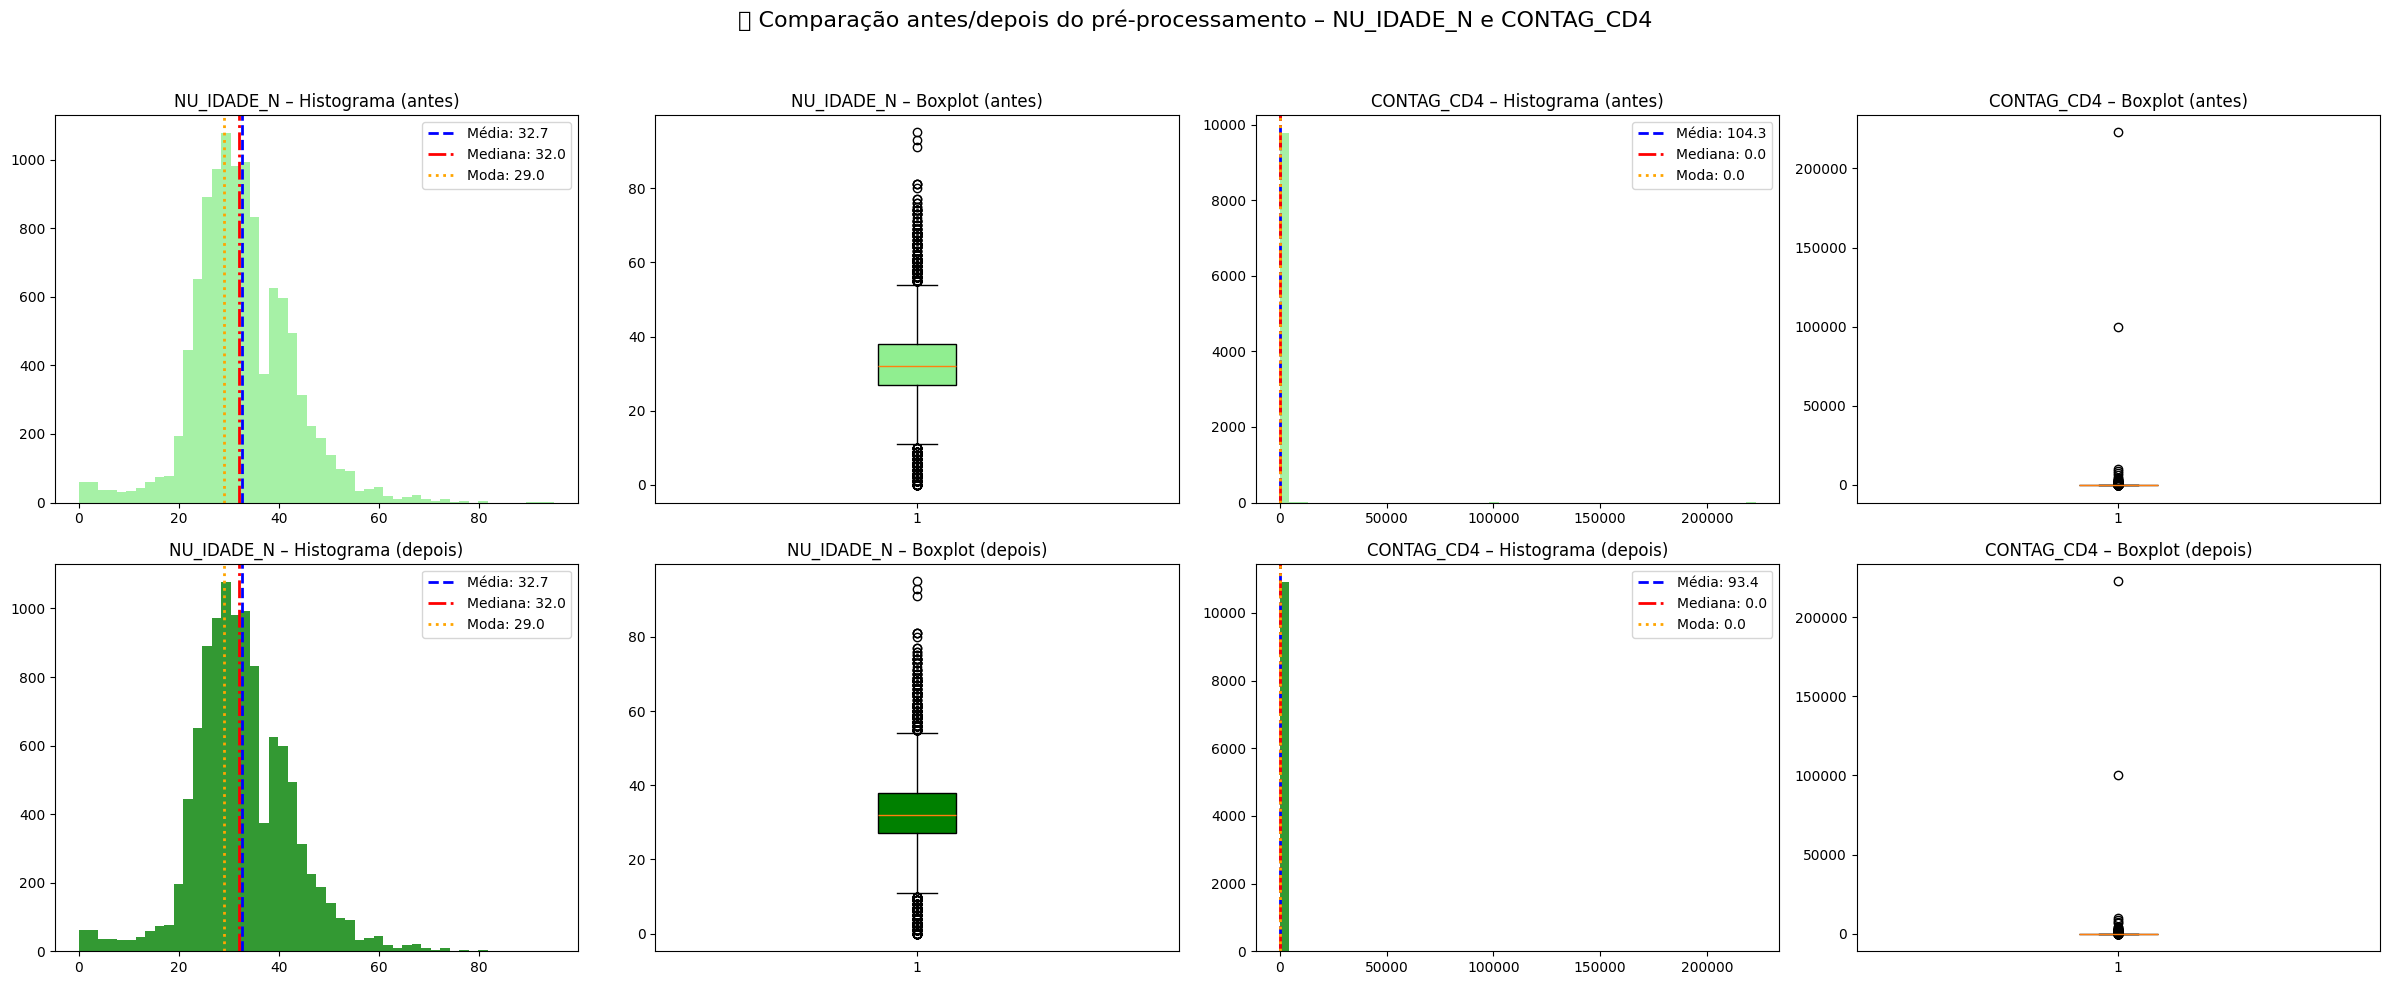

In [38]:
# 📊 Comparação antes/depois do pré-processamento – NU_IDADE_N e CONTAG_CD4
#import matplotlib.pyplot as plt
#import pandas as pd
#from scipy import stats

df_before = df_raw.copy()   # dataset bruto
df_after  = df_prep.copy()  # dataset após pré-processamento

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 linhas (antes/depois), 4 colunas (variáveis/gráficos)
BINSIZE = 50

def add_stats_lines(ax, values, color_map):
    """Adiciona linhas de média, mediana e moda no histograma."""
    mean_val = values.mean()
    median_val = pd.Series(values).median()
    mode_val = stats.mode(values, keepdims=True).mode[0] if len(values) > 0 else None

    ax.axvline(mean_val, color=color_map["mean"], linestyle="--", linewidth=2, label=f"Média: {mean_val:.1f}")
    ax.axvline(median_val, color=color_map["median"], linestyle="-.", linewidth=2, label=f"Mediana: {median_val:.1f}")
    if mode_val is not None:
        ax.axvline(mode_val, color=color_map["mode"], linestyle=":", linewidth=2, label=f"Moda: {mode_val:.1f}")
    ax.legend()

# --- Linha 1: ANTES ---
# NU_IDADE_N
vals_before_age = pd.to_numeric(df_before["NU_IDADE_N"], errors="coerce").dropna().values
axes[0, 0].hist(vals_before_age, bins=BINSIZE, color="lightgreen", alpha=0.8)
add_stats_lines(axes[0, 0], vals_before_age, {"mean": "blue", "median": "red", "mode": "orange"})
axes[0, 0].set_title("NU_IDADE_N – Histograma (antes)")
axes[0, 1].boxplot(vals_before_age, vert=True, patch_artist=True,
                   boxprops=dict(facecolor="lightgreen"))
axes[0, 1].set_title("NU_IDADE_N – Boxplot (antes)")

# CONTAG_CD4
vals_before_cd4 = pd.to_numeric(df_before["CONTAG_CD4"], errors="coerce").dropna().values
axes[0, 2].hist(vals_before_cd4, bins=BINSIZE, color="lightgreen", alpha=0.8)
add_stats_lines(axes[0, 2], vals_before_cd4, {"mean": "blue", "median": "red", "mode": "orange"})
axes[0, 2].set_title("CONTAG_CD4 – Histograma (antes)")
axes[0, 3].boxplot(vals_before_cd4, vert=True, patch_artist=True,
                   boxprops=dict(facecolor="lightgreen"))
axes[0, 3].set_title("CONTAG_CD4 – Boxplot (antes)")

# --- Linha 2: DEPOIS ---
# NU_IDADE_N
vals_after_age = pd.to_numeric(df_after["NU_IDADE_N"], errors="coerce").dropna().values
axes[1, 0].hist(vals_after_age, bins=BINSIZE, color="green", alpha=0.8)
add_stats_lines(axes[1, 0], vals_after_age, {"mean": "blue", "median": "red", "mode": "orange"})
axes[1, 0].set_title("NU_IDADE_N – Histograma (depois)")
axes[1, 1].boxplot(vals_after_age, vert=True, patch_artist=True,
                   boxprops=dict(facecolor="green"))
axes[1, 1].set_title("NU_IDADE_N – Boxplot (depois)")

# CONTAG_CD4
vals_after_cd4 = pd.to_numeric(df_after["CONTAG_CD4"], errors="coerce").dropna().values
axes[1, 2].hist(vals_after_cd4, bins=BINSIZE, color="green", alpha=0.8)
add_stats_lines(axes[1, 2], vals_after_cd4, {"mean": "blue", "median": "red", "mode": "orange"})
axes[1, 2].set_title("CONTAG_CD4 – Histograma (depois)")
axes[1, 3].boxplot(vals_after_cd4, vert=True, patch_artist=True,
                   boxprops=dict(facecolor="green"))
axes[1, 3].set_title("CONTAG_CD4 – Boxplot (depois)")

plt.suptitle("📊 Comparação antes/depois do pré-processamento – NU_IDADE_N e CONTAG_CD4", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 📌 Síntese interpretativa da EDA

- _Valores discrepantes (outliers) em geral:_ identificados e mantidos quando clinicamente plausíveis; corrigidos apenas quando inconsistentes.  

- _NU_IDADE_N:_
  - Antes: lacunas e maior dispersão devido a faltantes.  
  - Depois: distribuição preservada, outliers plausíveis (idosos) mantidos.  

- _CONTAG_CD4:_
  - Antes: valores como `"INDETECTAVEL"` viraram NaN, criando falhas na distribuição.  
  - Depois: imputação recompôs a forma esperada, mantendo assimetria natural e outliers clínicos (CD4 muito baixos).  

- _Relações bivariadas:_ já controladas pelos filtros de correlação aplicados no pipeline; análise adicional considerada opcional.  

- _Distribuição de classes:_ será analisada na Engenharia de Atributos, após criação das variáveis-alvo binárias (`target_hosp`, `target_obito_any`, `target_obito_mpx`).  

- _Prontidão do dataset:_
  - O `df_prep` está consolidado para as próximas etapas:  
    - Criação das variáveis-alvo binárias.  
    - Seleção de atributos (auditoria pós-correlação já realizada).  
    - Codificação (OneHot para variáveis nominais).  
    - Escalonamento (StandardScaler e MinMaxScaler, ambos mantidos para teste comparativo).  

### 🔎 Interpretação Geral
- O pré-processamento corrigiu faltantes e padronizou tipos sem distorcer as distribuições.  
- Valores discrepantes plausíveis foram preservados por relevância clínica.  
- O dataset `df_prep` está pronto para avançar às próximas etapas de Engenharia e Modelagem, mantendo informação crítica sobre idade e imunossupressão.

✌ Com isso, a análise exploratória está encerrada e documentada, garantindo transparência no impacto de cada etapa do pré-processamento.


## 💾 **Persistência** de dados e artefatos no pipeline

No fluxo de Ciência de Dados, persistir datasets e modelos intermediários é essencial para:  
- Evitar retrabalho (não precisar reprocessar desde o bruto).  
- Garantir reprodutibilidade e transparência.  
- Compartilhar resultados entre etapas, times e pipelines.  

| Formato | Vantagens | Desvantagens | Tamanho típico | Casos de uso ideais |
|---------|-----------|--------------|----------------|----------------------|
| **CSV (.csv)** | - Universal (abre em qualquer software, até Excel) <br> - Simples de manipular | - Arquivo grande <br> - Perda de tipagem (categorias/datetime) <br> - Lento em grandes volumes | 📦 **Maior tamanho** (~5–10x maior que `.parquet`) | Compartilhar datasets pequenos/médios com não técnicos |
| **Parquet (.parquet)** | - Alta compressão (formato colunar) <br> - Preserva tipos (`int64`, `datetime`, `category`) <br> - Leitura seletiva de colunas <br> - Escalável para Big Data | - Binário (não legível direto) <br> - Requer libs como `pyarrow` ou `fastparquet` | 📦 **Menor tamanho** (até 10x menor que `.csv`) | Persistência de **datasets intermediários** em pipelines de ML |
| **Pickle (.pkl)** | - Serializa **objetos Python** (modelos, transformadores, pipelines) <br> - Rápido para salvar/carregar | - Proprietário do Python <br> - Pode ter problemas de compatibilidade entre versões <br> - Risco de segurança ao carregar arquivos não confiáveis | 📦 **Intermediário** | Persistência de **modelos treinados, escalonadores e transformadores** |

📌 **Resumo prático do projeto:**  
- Datasets intermediários  
  - Parte 1 (`df_prep`) → salvo em `.csv` (para simples EDA) **e** em `.parquet` (para uso posterior).  
  - Parte 2 (`df_feateng`, `df_eng_ohe`) → salvos em `.parquet` para garantir eficiência e tipagem preservada.  

- Escalonadores e modelos treinados   
  - Ex.: `StandardScaler`, `MinMaxScaler`, Random Forest → salvos em `.pkl` (via `joblib`).  



In [39]:
# ==========================================
# 💾 Persistência do dataset pré-processado
# ==========================================

# 1) Salvar em CSV (_debug / EDA simples_)
csv_path = "mpox_2022_prep.csv"
df_prep.to_csv(csv_path, index=False, encoding="utf-8")
print(f"✅ Dataset salvo em CSV (uso rápido/depuração): {csv_path}")

# 2) Serializar em Parquet (uso oficial no pipeline)
parquet_path = "mpox_2022_prep.parquet"
df_prep.to_parquet(parquet_path, index=False, engine="pyarrow")
print(f"✅ Dataset serializado em Parquet (uso no pipeline): {parquet_path}")


✅ Dataset salvo em CSV (uso rápido/depuração): mpox_2022_prep.csv
✅ Dataset serializado em Parquet (uso no pipeline): mpox_2022_prep.parquet
